In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.kernel_approximation import RBFSampler
from sklearn.base import BaseEstimator, TransformerMixin
from prettytable import PrettyTable
#!pip install tensorflow-probability
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.cluster import KMeans

# import sys
# sys.path.append('/content/drive/MyDrive/Project 559')
# import preprocessing
import os
import importlib.util



In [ ]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv("/content/drive/MyDrive/Project 559/laptop_data_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Project 559/laptop_data_test.csv")

# Specify the path to your file
file_path = '/content/drive/MyDrive/Project 559/preprocessing.py'

# Load the module
spec = importlib.util.spec_from_file_location("preprocessing", file_path)
preprocessing = importlib.util.module_from_spec(spec)
spec.loader.exec_module(preprocessing)

Mounted at /content/drive


In [ ]:
df.head()

,Number,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Potential Preprocessing:
One Hot:
1.   Company Name
2.   GPU
3.   OpSys

Convert into numerical data:
1. Screen Resolution: Split into len and width
2. Ram: Number of GB's
3. MemoryL Number of GB's
4. Weight: Number of Kgs



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project 559/laptop_data_train.csv")
df['Ram'] = df['Ram'].str[0:-2].astype(int)
df['Weight'] = df['Weight'].str[0:-2].astype(float)

df

,Number,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
896,896,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62,49497.1200
897,897,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,47952.0000
898,898,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,32713.9200
899,899,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,49816.8000


In [ ]:
df.dtypes

Number                int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [ ]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD'], dtype=object)

In [ ]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

One-hot encoding on Operating System column

In [ ]:
opsys_data = df[['OpSys']]
encoder = OneHotEncoder(drop='first')
#Fit and transforming the 'OpSys' data to get a dense matrix
encoded_opsys = encoder.fit_transform(opsys_data).toarray()
# Converting the encoded data into a DataFrame
encoded_opsys_df = pd.DataFrame(encoded_opsys, columns=encoder.get_feature_names_out(['OpSys']))

print(encoded_opsys_df)

#Dropping the original 'OpSys' column from the original dataframe
df_dropped = df.drop('OpSys', axis=1)

#Concatenating the original dataframe (without 'OpSys') and the encoded_opsys_df
df_2 = pd.concat([df_dropped.reset_index(drop=True),
                               encoded_opsys_df.reset_index(drop=True)], axis=1)

print(df_2.head())



     OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  OpSys_No OS  \
0                0.0          0.0             0.0          0.0   
1                0.0          0.0             0.0          0.0   
2                0.0          0.0             0.0          1.0   
3                0.0          0.0             0.0          0.0   
4                0.0          0.0             0.0          0.0   
..               ...          ...             ...          ...   
896              0.0          1.0             0.0          0.0   
897              0.0          0.0             0.0          0.0   
898              0.0          0.0             0.0          0.0   
899              0.0          0.0             0.0          0.0   
900              0.0          0.0             0.0          0.0   

     OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS  
0                 0.0                 0.0              0.0          1.0  
1                 0.0                 0.0              0.0 

In [ ]:
print(df_2.head())

   Number Company   TypeName  Inches                    ScreenResolution  \
0       0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1       1   Apple  Ultrabook    13.3                            1440x900   
2       2      HP   Notebook    15.6                   Full HD 1920x1080   
3       3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4       4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  Weight        Price  OpSys_Chrome OS  \
0  Intel Iris Plus Graphics 640    1.37   71378.6832              0.0   
1        Intel HD Graphics 6000    1.34   

In [ ]:
df.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

Nominal Categorical: Company, TypeName, ScreenResolution (break down in 2: display name, resolution), CPU (breakdown in 3: Processor brand, model, model number), Memory (size, storage type), GPU, OpSys

In [ ]:
print(df_2.shape)

(901, 19)


Categorical columns:
['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']


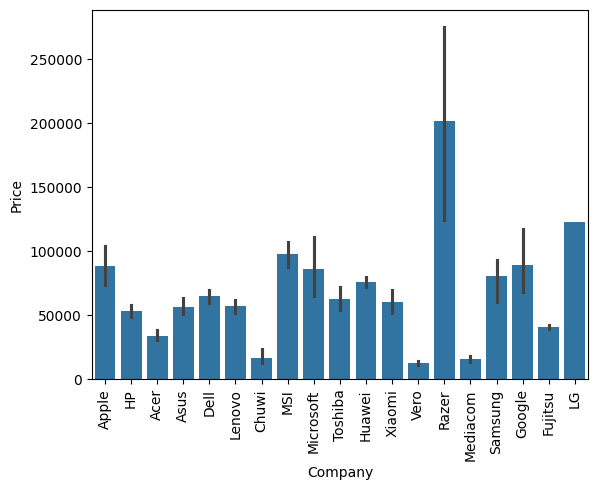

In [ ]:
df_2.Company.unique()
# Getting list of categorical columns
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical columns:")
print(object_cols)
#what is avg price of each brand?

sns.barplot(x=df_2['Company'], y=df_2['Price'])

plt.xticks(rotation="vertical")

plt.show()

In [ ]:
company_data = df_2[['Company']]
encoder = OneHotEncoder(drop='first')
#Fit and transforming the 'Company' data to get a dense matrix
encoded_company = encoder.fit_transform(company_data).toarray()
# Converting the encoded data into a DataFrame
encoded_company_df = pd.DataFrame(encoded_company, columns=encoder.get_feature_names_out(['Company']))

print(encoded_company_df)

#Dropping the original 'Company' column from the original dataframe
df_dropped = df_2.drop('Company', axis=1)

#Concatenating the original dataframe (without 'OpSys') and the encoded_opsys_df
df_2 = pd.concat([df_dropped.reset_index(drop=True),
                               encoded_company_df.reset_index(drop=True)], axis=1)

print(df_2.head())

     Company_Apple  Company_Asus  Company_Chuwi  Company_Dell  \
0              1.0           0.0            0.0           0.0   
1              1.0           0.0            0.0           0.0   
2              0.0           0.0            0.0           0.0   
3              1.0           0.0            0.0           0.0   
4              1.0           0.0            0.0           0.0   
..             ...           ...            ...           ...   
896            0.0           0.0            0.0           1.0   
897            0.0           0.0            0.0           0.0   
898            0.0           0.0            0.0           1.0   
899            0.0           0.0            0.0           1.0   
900            0.0           0.0            0.0           1.0   

     Company_Fujitsu  Company_Google  Company_HP  Company_Huawei  Company_LG  \
0                0.0             0.0         0.0             0.0         0.0   
1                0.0             0.0         0.0           

In [ ]:
print(df_2.shape)

(901, 36)


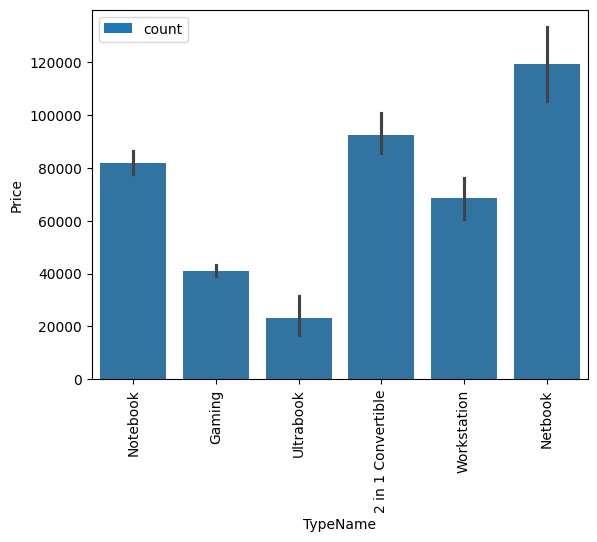

In [ ]:
df.TypeName.unique()
df_2['TypeName'].value_counts().plot(kind='bar')
sns.barplot(x=df_2['TypeName'], y=df_2['Price'])
plt.xticks(rotation="vertical")
plt.show()

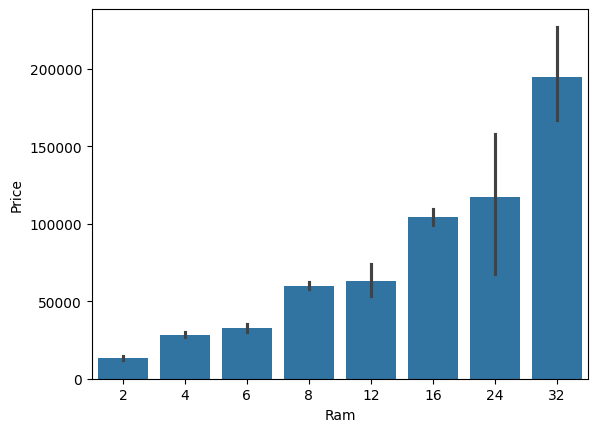

In [ ]:
df_2.Ram.unique()
sns.barplot(x=df_2['Ram'], y=df_2['Price'])
plt.show()

In [ ]:
TypeName_data = df_2[['TypeName']]
encoder = OneHotEncoder(drop='first')
#Fit and transforming the 'TypeName' data to get a dense matrix
encoded_TypeName = encoder.fit_transform(TypeName_data).toarray()
# Converting the encoded data into a DataFrame
encoded_TypeName_df = pd.DataFrame(encoded_TypeName, columns=encoder.get_feature_names_out(['TypeName']))

print(encoded_TypeName_df)

#Dropping the original 'TypeName' column from the original dataframe
df_dropped = df_2.drop('TypeName', axis=1)

#Concatenating the original dataframe (without 'OpSys') and the encoded_opsys_df
df_2 = pd.concat([df_dropped.reset_index(drop=True),
                               encoded_TypeName_df.reset_index(drop=True)], axis=1)

print(df_2.head())



     TypeName_Gaming  TypeName_Netbook  TypeName_Notebook  TypeName_Ultrabook  \
0                0.0               0.0                0.0                 1.0   
1                0.0               0.0                0.0                 1.0   
2                0.0               0.0                1.0                 0.0   
3                0.0               0.0                0.0                 1.0   
4                0.0               0.0                0.0                 1.0   
..               ...               ...                ...                 ...   
896              1.0               0.0                0.0                 0.0   
897              0.0               0.0                1.0                 0.0   
898              0.0               0.0                1.0                 0.0   
899              0.0               0.0                1.0                 0.0   
900              0.0               0.0                0.0                 0.0   

     TypeName_Workstation  

In [ ]:
pattern = r'(?P<displayName>.*?)(?P<Resolution>\d+x\d+)$'

# Extracting displayName and Resolution using the defined pattern
df_2[['displayName', 'Resolution']] = df['ScreenResolution'].str.extract(pattern)
df_2 = df_2.drop(columns=['ScreenResolution'])

print(df_2)

     Number  Inches                          Cpu  Ram               Memory  \
0         0    13.3         Intel Core i5 2.3GHz    8            128GB SSD   
1         1    13.3         Intel Core i5 1.8GHz    8  128GB Flash Storage   
2         2    15.6   Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3         3    15.4         Intel Core i7 2.7GHz   16            512GB SSD   
4         4    13.3         Intel Core i5 3.1GHz    8            256GB SSD   
..      ...     ...                          ...  ...                  ...   
896     896    15.6  Intel Core i7 7700HQ 2.8GHz    8              1TB HDD   
897     897    15.6   Intel Core i7 7500U 2.7GHz    8              1TB HDD   
898     898    15.6   Intel Core i3 6006U 2.0GHz    4              1TB HDD   
899     899    15.6   Intel Core i5 7300U 2.6GHz    8            500GB HDD   
900     900    13.3    Intel Core i7 7Y75 1.3GHz    8            512GB SSD   

                              Gpu  Weight        Price  OpSys_C

                             Cpu      CPU_Brand
0           Intel Core i5 2.3GHz  Intel Core i5
1           Intel Core i5 1.8GHz  Intel Core i5
2     Intel Core i5 7200U 2.5GHz  Intel Core i5
3           Intel Core i7 2.7GHz  Intel Core i7
4           Intel Core i5 3.1GHz  Intel Core i5
..                           ...            ...
896  Intel Core i7 7700HQ 2.8GHz  Intel Core i7
897   Intel Core i7 7500U 2.7GHz  Intel Core i7
898   Intel Core i3 6006U 2.0GHz  Intel Core i3
899   Intel Core i5 7300U 2.6GHz  Intel Core i5
900    Intel Core i7 7Y75 1.3GHz  Intel Core i7

[901 rows x 2 columns]


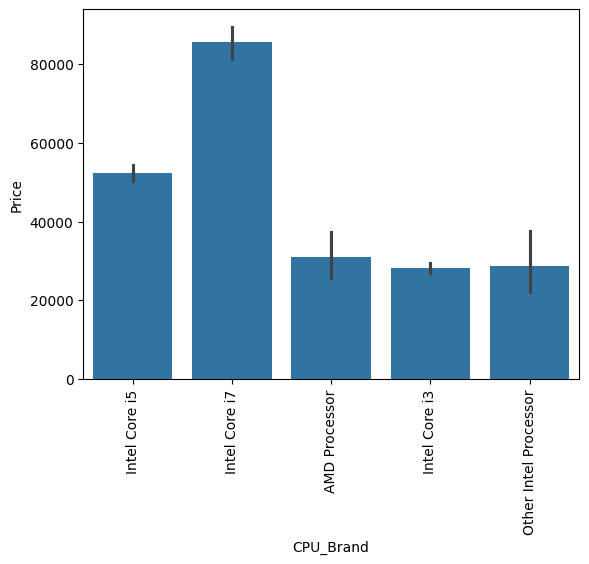

   Number  Inches  Ram               Memory                           Gpu  \
0       0    13.3    8            128GB SSD  Intel Iris Plus Graphics 640   
1       1    13.3    8  128GB Flash Storage        Intel HD Graphics 6000   
2       2    15.6    8            256GB SSD         Intel HD Graphics 620   
3       3    15.4   16            512GB SSD            AMD Radeon Pro 455   
4       4    13.3    8            256GB SSD  Intel Iris Plus Graphics 650   

   Weight        Price  OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  ...  \
0    1.37   71378.6832              0.0          0.0             0.0  ...   
1    1.34   47895.5232              0.0          0.0             0.0  ...   
2    1.86   30636.0000              0.0          0.0             0.0  ...   
3    1.83  135195.3360              0.0          0.0             0.0  ...   
4    1.37   96095.8080              0.0          0.0             0.0  ...   

   TypeName_Notebook  TypeName_Ultrabook  TypeName_Workstation  \
0       

In [ ]:
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

df_2['CPU_Brand'] = df['Cpu'].apply(fetch_processor)
print(df_2[['Cpu', 'CPU_Brand']])
sns.barplot(x=df_2['CPU_Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# brand_pattern = r'\s*(Intel|AMD)'

# # Extract the CPU brand
# df_2['CPU_Brand'] = df_2['Cpu'].str.extract(brand_pattern)

# # Drop the original 'Cpu' column if no longer needed
clock_speed_pattern = r'(\d+\.?\d*\s*GHz)'

# Extract the clock speed
df_2['CPU_Clock_Speed'] = df_2['Cpu'].str.extract(clock_speed_pattern)
df_2 = df_2.drop(columns=['Cpu'])

df_2.CPU_Brand.unique()
# df_2.CPU_Clock_Speed.unique()
# nan_counttt = df_2['CPU_Clock_Speed'].isna().sum()
# print(nan_counttt)
cpu_brand_data = df_2[['CPU_Brand']]
encoder = OneHotEncoder(drop='first')
#Fit and transforming the 'OpSys' data to get a dense matrix
encoded_cpu_brand = encoder.fit_transform(cpu_brand_data).toarray()
# Converting the encoded data into a DataFrame
encoded_cpu_brand_df = pd.DataFrame(encoded_cpu_brand, columns=encoder.get_feature_names_out(['CPU_Brand']))

#print(encoded_cpu_brand_df)

#Dropping the original 'CPU_Brand' column from the original dataframe
df_dropped = df_2.drop('CPU_Brand', axis=1)

#Concatenating the original dataframe (without 'CPU_Brand') and the encoded_cpu_brand_df
df_2 = pd.concat([df_dropped.reset_index(drop=True),
                               encoded_cpu_brand_df.reset_index(drop=True)], axis=1)
print(df_2.head())



In [ ]:
df_2['HDD'] = 0
df_2['SSD'] = 0
df_2['Flash Storage'] = 0

# Iterate over each row
for index, row in df.iterrows():
    memory = row['Memory']
    # Split the string by '+'
    components = memory.split('+')
    for comp in components:
        # Extract storage capacity and type
        storage = comp.strip().split(' ')
        capacity = float(storage[0].replace('GB', '')) if 'GB' in storage[0] else float(storage[0].replace('TB', '')) * 1024
        if 'HDD' in storage:
            df_2.at[index, 'HDD'] = capacity
        elif 'SSD' in storage:
            df_2.at[index, 'SSD'] = capacity
        elif 'Flash' in storage:
            df_2.at[index, 'Flash Storage'] = capacity

# Drop the original 'Memory' column
df_2.drop(columns=['Memory'], inplace=True)

print(df_2)

     Number  Inches  Ram                           Gpu  Weight        Price  \
0         0    13.3    8  Intel Iris Plus Graphics 640    1.37   71378.6832   
1         1    13.3    8        Intel HD Graphics 6000    1.34   47895.5232   
2         2    15.6    8         Intel HD Graphics 620    1.86   30636.0000   
3         3    15.4   16            AMD Radeon Pro 455    1.83  135195.3360   
4         4    13.3    8  Intel Iris Plus Graphics 650    1.37   96095.8080   
..      ...     ...  ...                           ...     ...          ...   
896     896    15.6    8     Nvidia GeForce GTX 1050Ti    2.62   49497.1200   
897     897    15.6    8          Nvidia GeForce 930MX    2.04   47952.0000   
898     898    15.6    4           AMD Radeon R5 M420X    2.18   32713.9200   
899     899    15.6    8         Intel HD Graphics 620    1.90   49816.8000   
900     900    13.3    8         Intel HD Graphics 615    1.24  107257.9680   

     OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  

In [ ]:
nan_counts = df_2.isna().sum()
print(nan_counts)
print(df_2.shape)

Number                             0
Inches                             0
Ram                                0
Gpu                                0
Weight                             0
Price                              0
OpSys_Chrome OS                    0
OpSys_Linux                        0
OpSys_Mac OS X                     0
OpSys_No OS                        0
OpSys_Windows 10                   0
OpSys_Windows 10 S                 0
OpSys_Windows 7                    0
OpSys_macOS                        0
Company_Apple                      0
Company_Asus                       0
Company_Chuwi                      0
Company_Dell                       0
Company_Fujitsu                    0
Company_Google                     0
Company_HP                         0
Company_Huawei                     0
Company_LG                         0
Company_Lenovo                     0
Company_MSI                        0
Company_Mediacom                   0
Company_Microsoft                  0
C

In [ ]:
df_2['CPU_Clock_Speed'] = df_2['CPU_Clock_Speed'].str.replace("GHz", "")
print(df_2)

     Number  Inches  Ram                           Gpu  Weight        Price  \
0         0    13.3    8  Intel Iris Plus Graphics 640    1.37   71378.6832   
1         1    13.3    8        Intel HD Graphics 6000    1.34   47895.5232   
2         2    15.6    8         Intel HD Graphics 620    1.86   30636.0000   
3         3    15.4   16            AMD Radeon Pro 455    1.83  135195.3360   
4         4    13.3    8  Intel Iris Plus Graphics 650    1.37   96095.8080   
..      ...     ...  ...                           ...     ...          ...   
896     896    15.6    8     Nvidia GeForce GTX 1050Ti    2.62   49497.1200   
897     897    15.6    8          Nvidia GeForce 930MX    2.04   47952.0000   
898     898    15.6    4           AMD Radeon R5 M420X    2.18   32713.9200   
899     899    15.6    8         Intel HD Graphics 620    1.90   49816.8000   
900     900    13.3    8         Intel HD Graphics 615    1.24  107257.9680   

     OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  

In [ ]:
df_2.displayName.unique()
#IPS Panel, Full HD, Touchscreen, 4K Ultra HD, Quad HD+, Retina Display

# List of features to extract from 'displayName'
features = ['IPS Panel', 'Full HD', 'Touchscreen', '4K Ultra HD', 'Quad HD+', 'Retina Display']

# Create a separate column for each feature
for feature in features:
    df_2[feature] = df_2['displayName'].str.contains(feature, case=False, na=False).astype(int)

# Drop the 'displayName' column from the DataFrame
df_2 = df_2.drop(columns='displayName')

# Display the updated DataFrame to verify the new structure
print(df_2)


     Number  Inches  Ram                           Gpu  Weight        Price  \
0         0    13.3    8  Intel Iris Plus Graphics 640    1.37   71378.6832   
1         1    13.3    8        Intel HD Graphics 6000    1.34   47895.5232   
2         2    15.6    8         Intel HD Graphics 620    1.86   30636.0000   
3         3    15.4   16            AMD Radeon Pro 455    1.83  135195.3360   
4         4    13.3    8  Intel Iris Plus Graphics 650    1.37   96095.8080   
..      ...     ...  ...                           ...     ...          ...   
896     896    15.6    8     Nvidia GeForce GTX 1050Ti    2.62   49497.1200   
897     897    15.6    8          Nvidia GeForce 930MX    2.04   47952.0000   
898     898    15.6    4           AMD Radeon R5 M420X    2.18   32713.9200   
899     899    15.6    8         Intel HD Graphics 620    1.90   49816.8000   
900     900    13.3    8         Intel HD Graphics 615    1.24  107257.9680   

     OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  

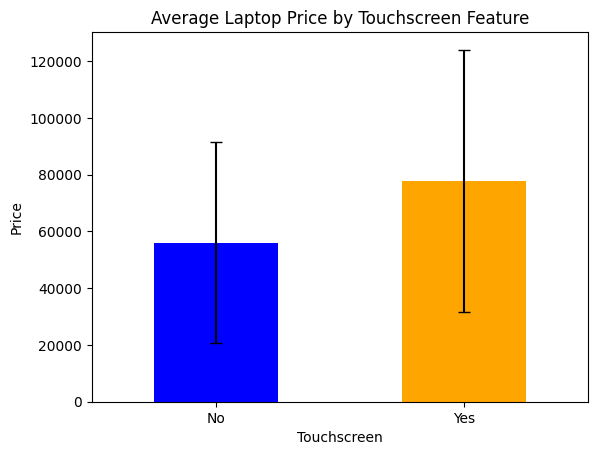

Touchscreen Count 126


In [ ]:
#how many laptops in data are touchscreen
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_2' is your DataFrame with a 'Price' column and a 'Touchscreen' binary column

# Calculate mean and standard deviation of price for both touchscreen and non-touchscreen laptops
price_stats = df_2.groupby('Touchscreen')['Price'].agg(['mean', 'std'])

# Plotting
fig, ax = plt.subplots()

# Error bars will represent the standard deviation of the prices
price_stats['mean'].plot(kind='bar', yerr=price_stats['std'], ax=ax, color=['blue', 'orange'], capsize=4)

# Setting labels and title
ax.set_ylabel('Price')
ax.set_xlabel('Touchscreen')
ax.set_title('Average Laptop Price by Touchscreen Feature')

# Formatting x-axis labels to show '0' and '1' as 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Displaying the plot
plt.show()
print("Touchscreen Count", df_2['Touchscreen'].sum())


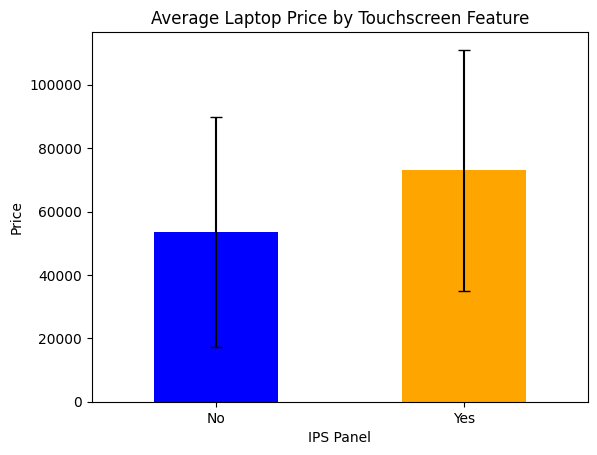

IPS Panel Count 258


In [ ]:
#how many laptops in data are touchscreen
# Assuming 'df_2' is your DataFrame with a 'Price' column and a 'Touchscreen' binary column

# Calculate mean and standard deviation of price for both touchscreen and non-touchscreen laptops
price_stats = df_2.groupby('IPS Panel')['Price'].agg(['mean', 'std'])

# Plotting
fig, ax = plt.subplots()

# Error bars will represent the standard deviation of the prices
price_stats['mean'].plot(kind='bar', yerr=price_stats['std'], ax=ax, color=['blue', 'orange'], capsize=4)

# Setting labels and title
ax.set_ylabel('Price')
ax.set_xlabel('IPS Panel')
ax.set_title('Average Laptop Price by Touchscreen Feature')

# Formatting x-axis labels to show '0' and '1' as 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Displaying the plot
plt.show()
print("IPS Panel Count", df_2['IPS Panel'].sum())


In [ ]:
#df_2.Memory_Storage_Type.unique()
#SSD, Flash Storage, HDD, 1 TB HDD, 500GB HDD, 256GB SSD, 2 TB SSD, 512GB SSD,  Hybrid, Flash Storage,
#SSD, HDD, Hybrid, Flash Storage, SDD_HDD_Combo

#screen resolution in height, width
#print(df_2)
df_2.Resolution.unique()
df_2[['Width', 'Height']] = df_2['Resolution'].str.split('x', expand=True).astype(int)
df_2 = df_2.drop(columns='Resolution')

# Display the updated DataFrame to verify new columns
print(df_2.head())


   Number  Inches  Ram                           Gpu  Weight        Price  \
0       0    13.3    8  Intel Iris Plus Graphics 640    1.37   71378.6832   
1       1    13.3    8        Intel HD Graphics 6000    1.34   47895.5232   
2       2    15.6    8         Intel HD Graphics 620    1.86   30636.0000   
3       3    15.4   16            AMD Radeon Pro 455    1.83  135195.3360   
4       4    13.3    8  Intel Iris Plus Graphics 650    1.37   96095.8080   

   OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  OpSys_No OS  ...  SSD  \
0              0.0          0.0             0.0          0.0  ...  128   
1              0.0          0.0             0.0          0.0  ...    0   
2              0.0          0.0             0.0          1.0  ...  256   
3              0.0          0.0             0.0          0.0  ...  512   
4              0.0          0.0             0.0          0.0  ...  256   

   Flash Storage  IPS Panel  Full HD  Touchscreen  4K Ultra HD  Quad HD+  \
0              0

In [ ]:
# Compute the correlation between 'Inches' and 'Price'
correlation = df_2['Inches'].corr(df_2['Price'])
print(correlation)
correlation2 = df_2['Height'].corr(df_2['Price'])
print(correlation)

0.08949875499630178
0.08949875499630178


<Axes: xlabel='Inches', ylabel='Price'>

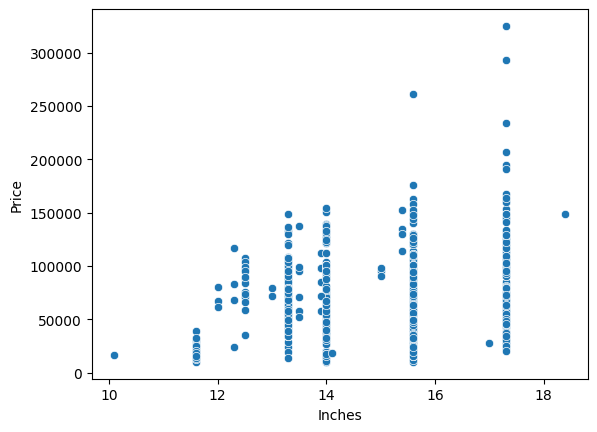

In [ ]:
sns.scatterplot(x=df_2['Inches'],y=df_2['Price'])

In [ ]:
#Making a new column: pixels per inches

df_2['PPI'] = (((df_2['Width']**2) + (df_2['Height']**2))**0.5/df_2['Inches']).astype('float')
# df_2.corr()['Price'].sort_values(ascending=False)
print(df_2)
corr = df_2['PPI'].corr(df_2['Price'])
print(corr)


     Number  Inches  Ram                           Gpu  Weight        Price  \
0         0    13.3    8  Intel Iris Plus Graphics 640    1.37   71378.6832   
1         1    13.3    8        Intel HD Graphics 6000    1.34   47895.5232   
2         2    15.6    8         Intel HD Graphics 620    1.86   30636.0000   
3         3    15.4   16            AMD Radeon Pro 455    1.83  135195.3360   
4         4    13.3    8  Intel Iris Plus Graphics 650    1.37   96095.8080   
..      ...     ...  ...                           ...     ...          ...   
896     896    15.6    8     Nvidia GeForce GTX 1050Ti    2.62   49497.1200   
897     897    15.6    8          Nvidia GeForce 930MX    2.04   47952.0000   
898     898    15.6    4           AMD Radeon R5 M420X    2.18   32713.9200   
899     899    15.6    8         Intel HD Graphics 620    1.90   49816.8000   
900     900    13.3    8         Intel HD Graphics 615    1.24  107257.9680   

     OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  

In [ ]:
#We got Better Correlation, dropping original columns
df_2.drop(columns = ['Inches','Height','Width'], inplace=True)
#print(df_2)
df_2.drop(columns='Number', inplace=True)
print(df_2)

     Ram                           Gpu  Weight        Price  OpSys_Chrome OS  \
0      8  Intel Iris Plus Graphics 640    1.37   71378.6832              0.0   
1      8        Intel HD Graphics 6000    1.34   47895.5232              0.0   
2      8         Intel HD Graphics 620    1.86   30636.0000              0.0   
3     16            AMD Radeon Pro 455    1.83  135195.3360              0.0   
4      8  Intel Iris Plus Graphics 650    1.37   96095.8080              0.0   
..   ...                           ...     ...          ...              ...   
896    8     Nvidia GeForce GTX 1050Ti    2.62   49497.1200              0.0   
897    8          Nvidia GeForce 930MX    2.04   47952.0000              0.0   
898    4           AMD Radeon R5 M420X    2.18   32713.9200              0.0   
899    8         Intel HD Graphics 620    1.90   49816.8000              0.0   
900    8         Intel HD Graphics 615    1.24  107257.9680              0.0   

     OpSys_Linux  OpSys_Mac OS X  OpSys

['Intel' 'AMD' 'Nvidia']


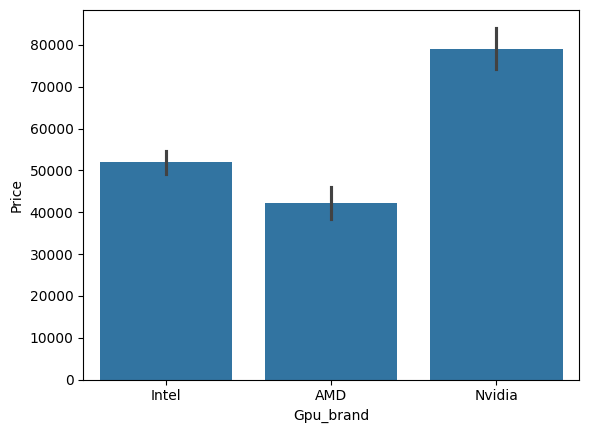

   Ram  Weight        Price  OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  \
0    8    1.37   71378.6832              0.0          0.0             0.0   
1    8    1.34   47895.5232              0.0          0.0             0.0   
2    8    1.86   30636.0000              0.0          0.0             0.0   
3   16    1.83  135195.3360              0.0          0.0             0.0   
4    8    1.37   96095.8080              0.0          0.0             0.0   

   OpSys_No OS  OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  ...  \
0          0.0               0.0                 0.0              0.0  ...   
1          0.0               0.0                 0.0              0.0  ...   
2          1.0               0.0                 0.0              0.0  ...   
3          0.0               0.0                 0.0              0.0  ...   
4          0.0               0.0                 0.0              0.0  ...   

   Flash Storage  IPS Panel  Full HD  Touchscreen  4K Ultra HD  Quad

In [ ]:
# Which brand GPU is in laptop
df_2['Gpu_brand'] = df_2['Gpu'].apply(lambda x: x.split()[0])
print(df_2.Gpu_brand.unique())
df_2.drop(columns=['Gpu'],inplace=True)

sns.barplot(x=df_2['Gpu_brand'], y=df_2['Price'])
plt.show()

#Now applying on-hot encoding on Gpu_brand column

# Extract CPU Brand data
gpu_brand_data = df_2[['Gpu_brand']]
encoder = OneHotEncoder(drop='first')
encoded_gpu_brand = encoder.fit_transform(gpu_brand_data).toarray()
# Converting the encoded data into a DataFrame
encoded_gpu_brand_df = pd.DataFrame(encoded_gpu_brand, columns=encoder.get_feature_names_out(['Gpu_brand']))
df_dropped = df_2.drop('Gpu_brand', axis=1)
# Concatenating into the original dataframe
df_2 = pd.concat([df_dropped.reset_index(drop=True), encoded_gpu_brand_df.reset_index(drop=True)], axis=1)
print(df_2.head())


<ipython-input-78-fd3337a86ae6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['Price'])


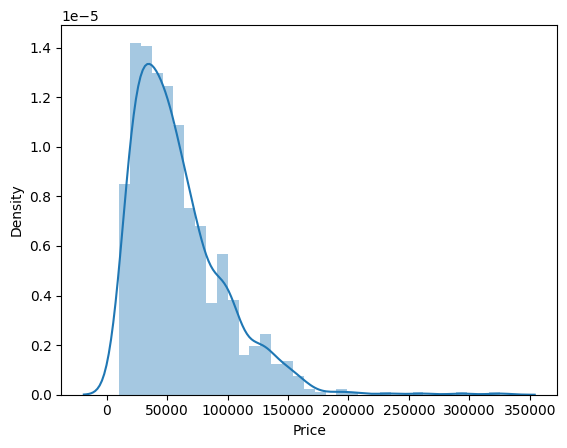

In [ ]:
sns.distplot(df_2['Price'])
plt.show()

<ipython-input-79-678a4c811f2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_2['Price']))


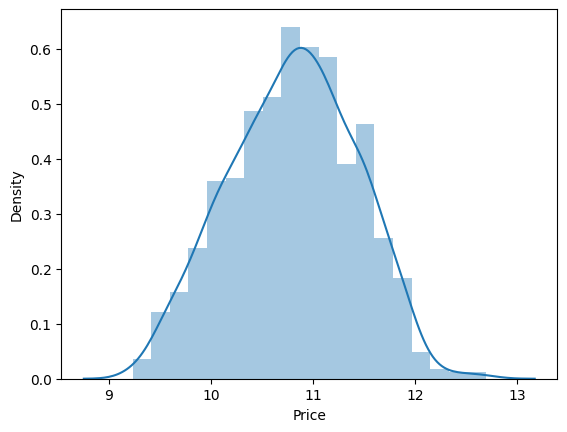

In [ ]:
sns.distplot(np.log(df_2['Price']))
plt.show()

In [ ]:
df_2['CPU_Clock_Speed'] = df_2['CPU_Clock_Speed'].astype(float)
df_2.CPU_Clock_Speed.unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [ ]:
print(df_2.dtypes)
print(df_2.shape)

Ram                                  int64
Weight                             float64
Price                              float64
OpSys_Chrome OS                    float64
OpSys_Linux                        float64
OpSys_Mac OS X                     float64
OpSys_No OS                        float64
OpSys_Windows 10                   float64
OpSys_Windows 10 S                 float64
OpSys_Windows 7                    float64
OpSys_macOS                        float64
Company_Apple                      float64
Company_Asus                       float64
Company_Chuwi                      float64
Company_Dell                       float64
Company_Fujitsu                    float64
Company_Google                     float64
Company_HP                         float64
Company_Huawei                     float64
Company_LG                         float64
Company_Lenovo                     float64
Company_MSI                        float64
Company_Mediacom                   float64
Company_Mic

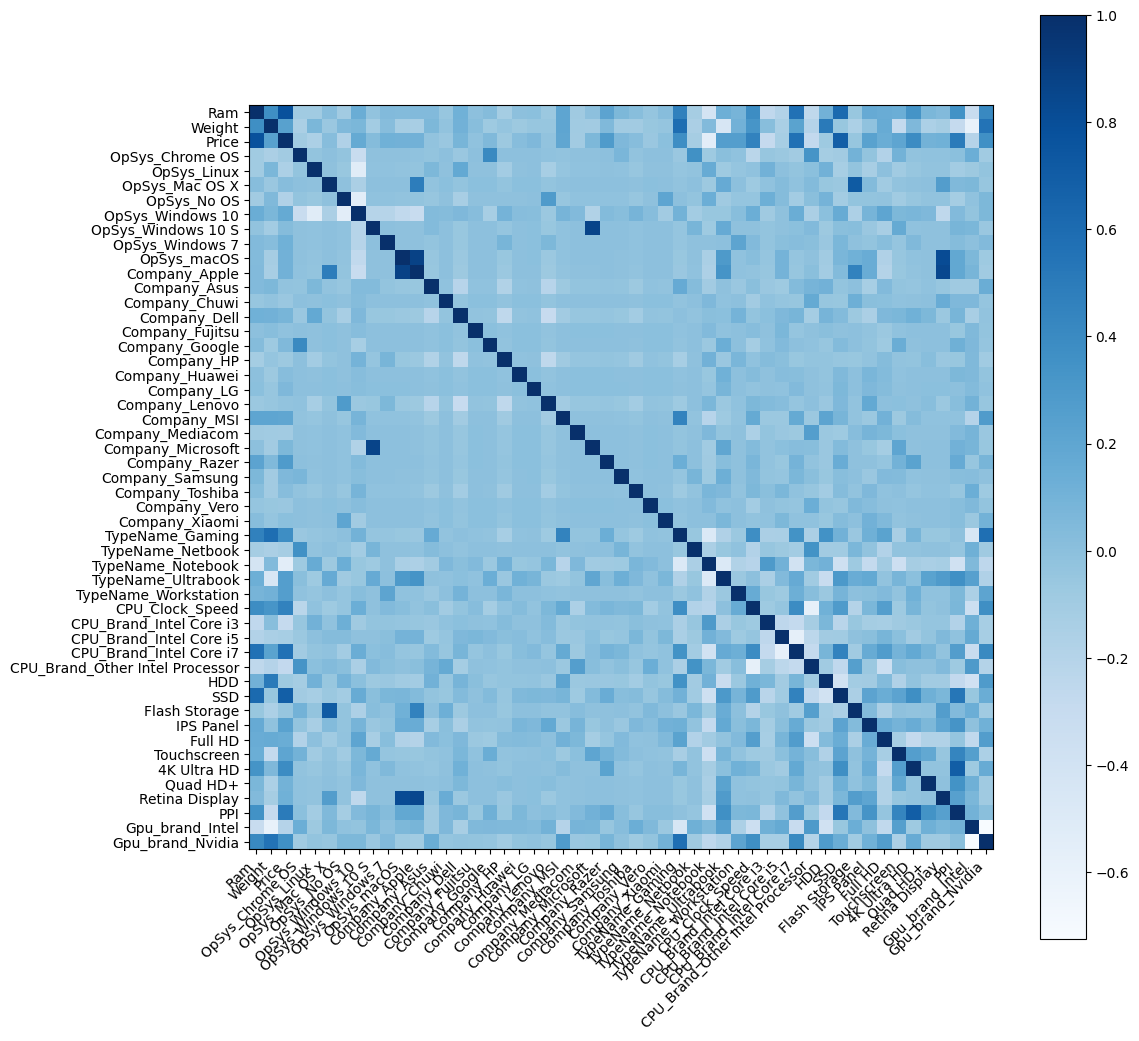

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

matrix = df_2.corr()
plt.figure(figsize=(12, 12))
#plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

#adding colorbar
plt.colorbar()

#extracting variable names
variables = []
for i in matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

In [ ]:
import pandas as pd

def identify_low_correlation_features(df, output_column, threshold=0.1):
    """
    Identify features with absolute correlation lower than the specified threshold with the output column.

    Parameters:
    - df: pandas DataFrame containing the features and output column.
    - output_column: the name of the output (target) column to compare.
    - threshold: the correlation value below which a feature is considered to have low correlation.

    Returns:
    - A list of feature names that have low correlation with the output column.
    """
    # Compute pairwise correlation of columns
    correlation_matrix = df.corr()

    # Isolate the correlations with the output column
    output_correlations = correlation_matrix[output_column].drop(output_column)

    # Identify features where the absolute value of correlation is below the threshold
    low_correlation_features = output_correlations[output_correlations.abs() < threshold].index.tolist()

    return low_correlation_features


low_corr_features = identify_low_correlation_features(df_2, 'Price', threshold=0.1)
print("Features with low correlation:", low_corr_features)
#df_2 = df_2.drop(columns=low_corr_features) #No effect of doing this
df_2.dtypes

Features with low correlation: ['OpSys_Mac OS X', 'OpSys_Windows 10 S', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_Microsoft', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'HDD', 'Flash Storage', 'Quad HD+']


Ram                                  int64
Weight                             float64
Price                              float64
OpSys_Chrome OS                    float64
OpSys_Linux                        float64
OpSys_Mac OS X                     float64
OpSys_No OS                        float64
OpSys_Windows 10                   float64
OpSys_Windows 10 S                 float64
OpSys_Windows 7                    float64
OpSys_macOS                        float64
Company_Apple                      float64
Company_Asus                       float64
Company_Chuwi                      float64
Company_Dell                       float64
Company_Fujitsu                    float64
Company_Google                     float64
Company_HP                         float64
Company_Huawei                     float64
Company_LG                         float64
Company_Lenovo                     float64
Company_MSI                        float64
Company_Mediacom                   float64
Company_Mic

**Applying the same preprocessing on Test Data**

In [ ]:
#df_test.shape
df_test = preprocessing.preprocessing(df_test)
df_test.shape
df_test['CPU_Clock_Speed'] = df_test['CPU_Clock_Speed'].astype(float)  #missed adding this in the preprocessing function
# df_test = df_test.drop(columns=low_corr_features)
#df_test = df_test.drop(columns=[col for col in low_corr_features if col in df_test.columns])    ####No effect
print(df_test.dtypes)
print(df_test.shape)

Ram                                  int64
Weight                             float64
Price                              float64
OpSys_Chrome OS                    float64
OpSys_Linux                        float64
OpSys_Mac OS X                     float64
OpSys_No OS                        float64
OpSys_Windows 10                   float64
OpSys_Windows 7                    float64
Company_Apple                      float64
Company_Asus                       float64
Company_Dell                       float64
Company_Fujitsu                    float64
Company_HP                         float64
Company_LG                         float64
Company_Lenovo                     float64
Company_MSI                        float64
Company_Razer                      float64
Company_Samsung                    float64
Company_Toshiba                    float64
Company_Vero                       float64
TypeName_Gaming                    float64
TypeName_Netbook                   float64
TypeName_No

Alighing the features of Test and Train data

In [ ]:
import pandas as pd

def align_dataframes(train_df, test_df, target_column=None):
    """
    Align the columns in the test dataframe to match those in the train dataframe.
    Extra columns in the test dataframe that are not present in the train dataframe will be dropped.
    Missing columns in the test dataframe will be added with the default values based on the dtype in the train dataframe.

    :param train_df: The training dataframe with the correct columns and dtypes.
    :param test_df: The test dataframe to be aligned.
    :param target_column: The name of the target column to exclude from alignment, if present.
    :return: The test dataframe aligned to the train dataframe.
    """
    # If target_column is specified and present in test_df, save it to add back later
    target_series = None
    if target_column and target_column in test_df:
        target_series = test_df[target_column]
        test_df = test_df.drop(columns=[target_column])

    # Drop columns in test_df that are not present in train_df
    test_df = test_df[train_df.columns.intersection(test_df.columns)]

    # Add missing columns from train_df to test_df
    for column in train_df.columns.difference(test_df.columns):
        if train_df[column].dtype.kind in ['i', 'f']:  # int or float dtype
            default_val = 0
        elif train_df[column].dtype.kind == 'O':  # object dtype
            default_val = 'missing'
        elif train_df[column].dtype.kind == 'b':  # boolean dtype
            default_val = False
        else:
            default_val = pd.NA

        test_df[column] = pd.Series([default_val] * len(test_df), index=test_df.index).astype(train_df[column].dtype)

    # Ensure columns are in the same order as in train_df
    test_df = test_df[train_df.columns]

    # If target column was saved earlier, add it back to test_df
    if target_series is not None:
        test_df[target_column] = target_series

    return test_df


test_df = align_dataframes(df_2, df_test, target_column='target')
print(test_df.shape)
print(df_2.shape)
print(test_df.dtypes)
df_2['Price'] = np.log(df_2['Price'])
test_df['Price'] = np.log(test_df['Price'])   #Log Normal Transformation

(402, 51)
(901, 51)
Ram                                  int64
Weight                             float64
Price                              float64
OpSys_Chrome OS                    float64
OpSys_Linux                        float64
OpSys_Mac OS X                     float64
OpSys_No OS                        float64
OpSys_Windows 10                   float64
OpSys_Windows 10 S                 float64
OpSys_Windows 7                    float64
OpSys_macOS                        float64
Company_Apple                      float64
Company_Asus                       float64
Company_Chuwi                      float64
Company_Dell                       float64
Company_Fujitsu                    float64
Company_Google                     float64
Company_HP                         float64
Company_Huawei                     float64
Company_LG                         float64
Company_Lenovo                     float64
Company_MSI                        float64
Company_Mediacom                  

In [ ]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def RMSE(y_true, y_pred):
  return(np.sqrt(((y_true - y_pred) ** 2).mean()))


In [ ]:
def evaluate_errors(y_predicted, y_true):
  y_true = np.array(y_true)
  rmse = RMSE(y_true, y_predicted)
  mae = mean_absolute_error(y_true, y_predicted)
  r2 = r_squared(y_true, y_predicted)
  print(f"RMSE: {rmse:.3f}")
  print(f"MAE: {mae:.3f}")
  print(f"R2: {r2:.3f}")
  return rmse, mae, r2
  #metrics_df = update_metrics_df(y_true, y_pred, metrics_df)

In [ ]:
x = df_2.drop("Price", axis = 1)
x_test = test_df.drop("Price", axis = 1)    #Defining Test features without label
y_predicted = x.mean(axis = 1)   #Baseline
evaluate_errors(y_predicted, df_2["Price"])
print(x.shape)
print(x_test.shape)

RMSE: 11.025
MAE: 7.918
R2: -314.031
(901, 50)
(402, 50)


# Implementation of Baseline Systems:


In [ ]:
from sklearn.model_selection import train_test_split

x, y_true = np.array(x), np.array(df_2["Price"])
test_x, test_y_true = np.array(x_test), np.array(test_df["Price"])   #Test dataset
# Assume X is your feature data and y is your target data
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)
# X_train.shape
x.shape

#print(test_y_true)

(901, 50)

**1. 1NN Algorithm**


In [ ]:
def euclidean_distance(x, y):
    """
    Calculate Euclidean distance between two points
    """
    return np.sqrt(np.sum((x-y) ** 2))

def one_nearest_neighbor_regression(X_train, y_train, X_test):
    """
    1NN Regression Algorithm
    """
    # Initialize predicted values
    y_pred = []

    # Loop through each test data point

    for x_test in X_test:
        # Calculate distances between test point and all training points
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]

        # Get the index of the nearest neighbor
        nearest_neighbor_idx = np.argmin(distances)


        # Predict the target value based on the nearest neighbor
        y_pred.append(y_train[nearest_neighbor_idx])

    return y_pred

y_predicted = one_nearest_neighbor_regression(X_train, y_train, X_test)   #on 20% of training data
print("Performance measures on Validation Data:")
evaluate_errors(y_predicted, y_test)

y_test_predicted = one_nearest_neighbor_regression(X_train, y_train, test_x)   #on Test data
print("Performance measures on Test Data:")
evaluate_errors(y_test_predicted, test_y_true)

Performance measures on Validation Data:
RMSE: 0.322
MAE: 0.231
R2: 0.753
Performance measures on Test Data:
RMSE: 0.340
MAE: 0.255
R2: 0.706


(0.3404928546867735, 0.25461816299066387, 0.7058291939811843)

**2. Linear Regression (No regularization)**

Performance measures on Validation Data:
RMSE: 0.221
MAE: 0.175
R2: 0.884


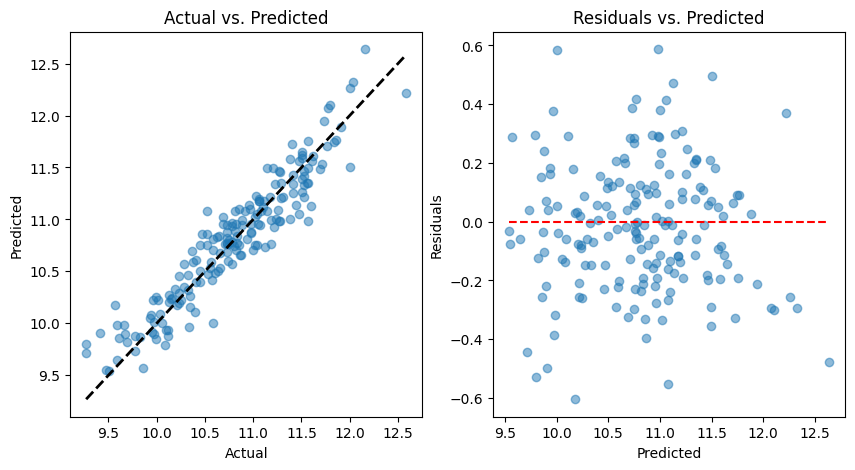

Performance measures on Test Data:
RMSE: 0.277
MAE: 0.208
R2: 0.806


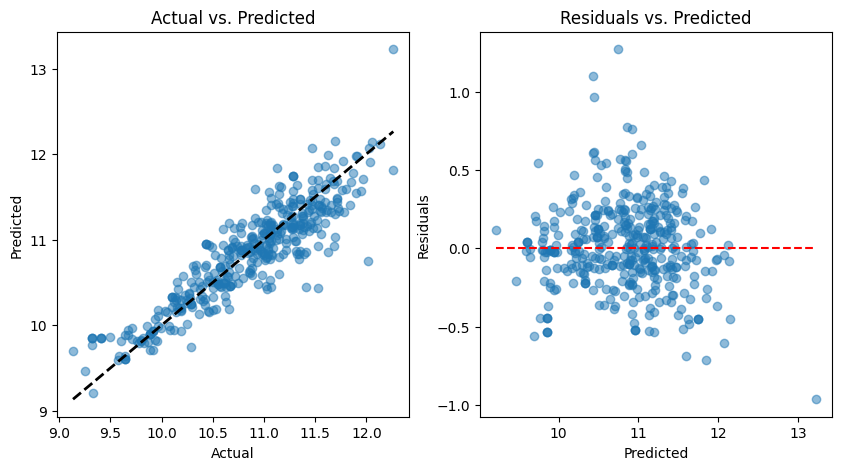

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_and_plot(model, X_test, y_test):
    """
    Evaluate the trained model on the test set and plot the results.

    :param model: A trained machine learning model.
    :param X_test: Test features.
    :param y_test: Actual target values for the test set.
    """
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate errors
    rmse, mae, r2 = evaluate_errors(y_pred, y_test)

    # Plotting actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')

    # Plotting residuals
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='--')  # Horizontal line at 0
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted')
    plt.show()
    return rmse

# Usage
def linear_regression(X_train, y_train):

  # Create and train a Linear Regression model
  lr = LinearRegression()
  lr.fit(X_train, y_train)  # Train the model on the entire training set
  return lr


lr = linear_regression(X_train, y_train)
# Evaluate on validation data
print("Performance measures on Validation Data:")
rmse = evaluate_and_plot(lr, X_test, y_test)   # Validation Data

# Evaluate on test data
print("Performance measures on Test Data:")
rmse = evaluate_and_plot(lr, test_x, test_y_true)  # Test Data
#rmse, mae, r2 = evaluate_errors(np.exp(lr.predict(test_x)), test_y_true)
#print(test_y_true)

2.1 Linear Regression (with Regularization)

Testing alpha: 1e-15


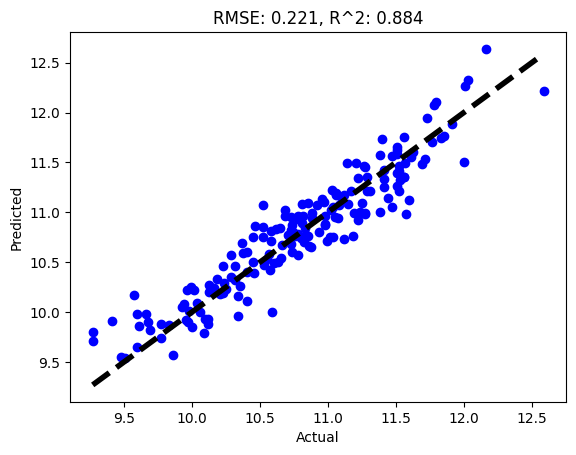

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.10292e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Testing alpha: 1e-10


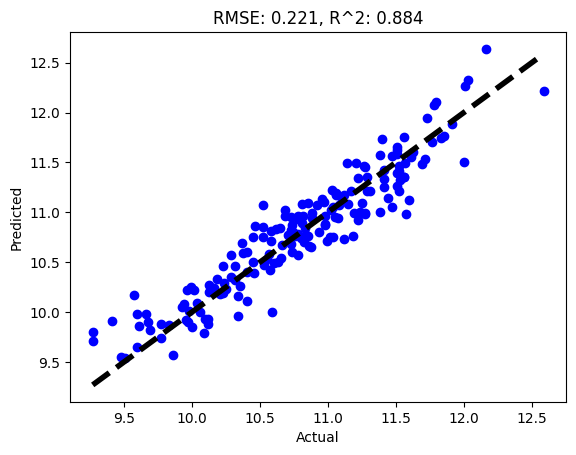

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.10395e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Testing alpha: 1e-08


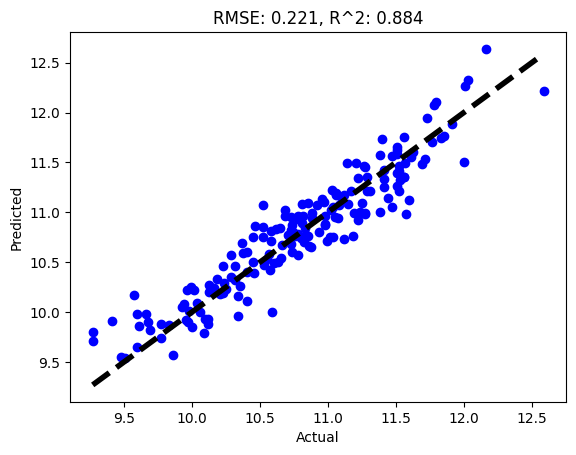

Testing alpha: 0.0001


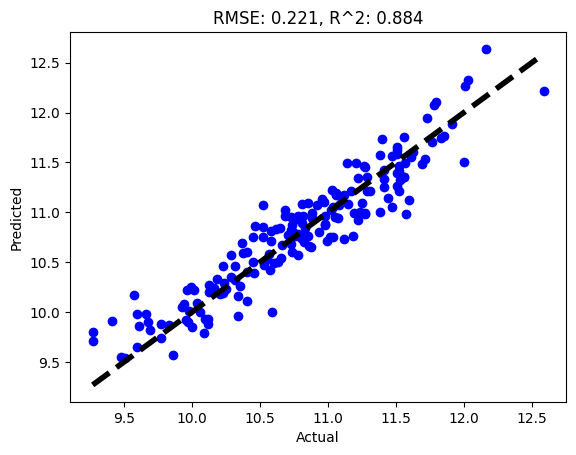

Testing alpha: 0.001


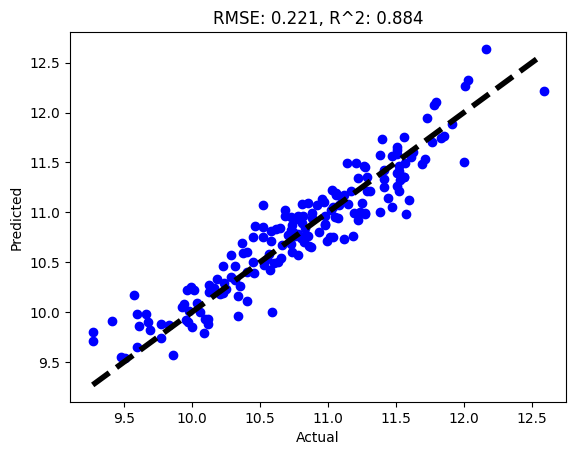

Testing alpha: 0.01


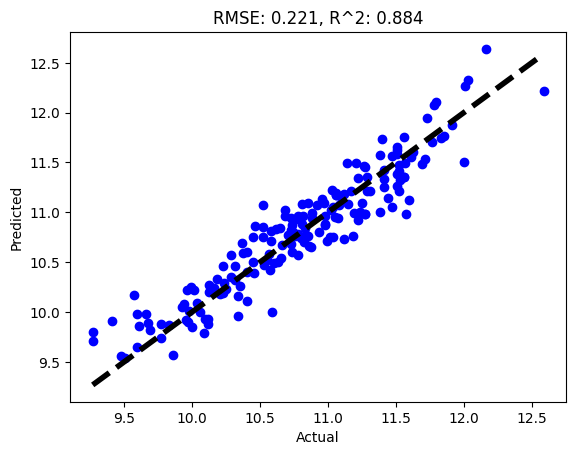

Testing alpha: 1


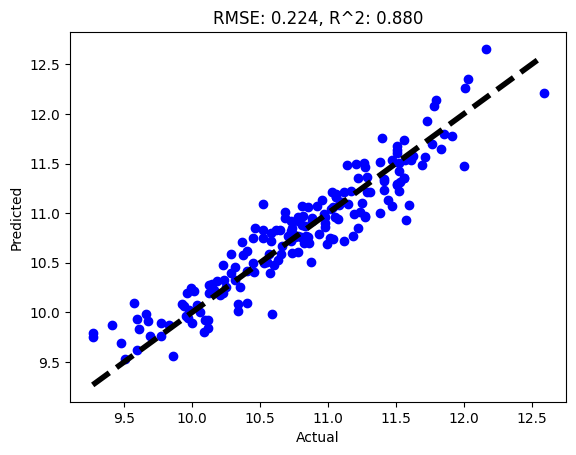

Testing alpha: 5


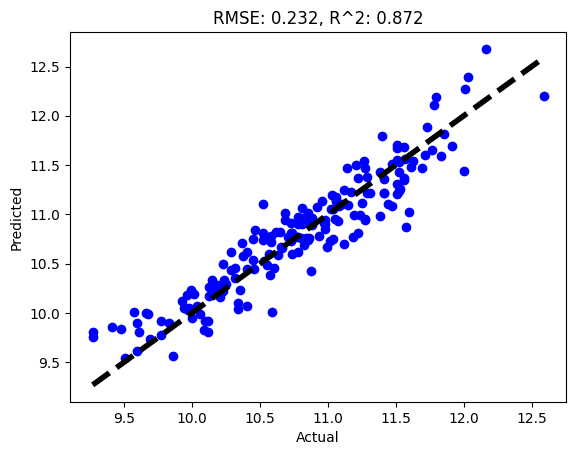

Testing alpha: 10


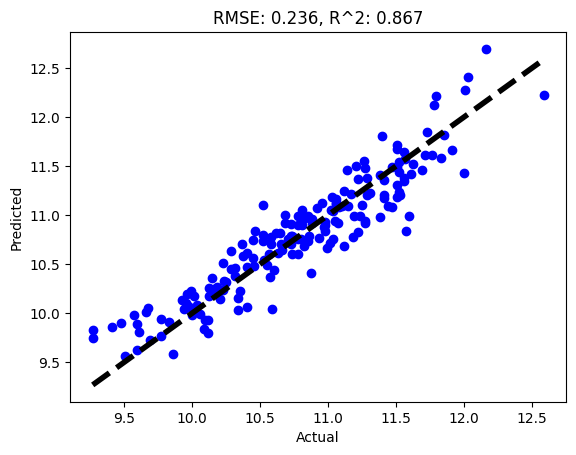

Testing alpha: 20


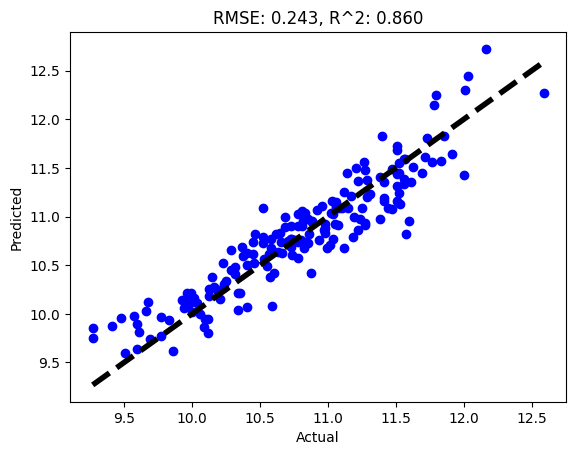

Best alpha found: 0.01
Lowest RMSE: 0.22069825008382069
Best Alpha is 0.01
Performance measures on Test Data:


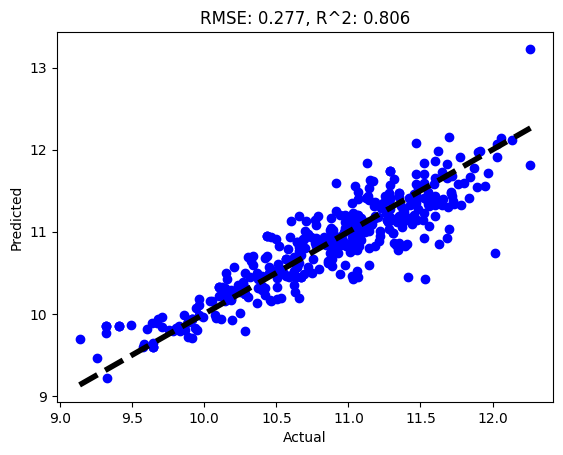

0.2765725695155875

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def train_ridge(X, y, alpha):
    """
    Trains a Ridge regression model using the given regularization strength (alpha).
    """
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    return model

def evaluate_and_plot(model, X, y):
    """
    Predicts using the model and plots the actual vs predicted values.
    Also calculates and returns the RMSE of the predictions.
    """
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    plt.scatter(y, y_pred, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'RMSE: {rmse:.3f}, R^2: {r2:.3f}')
    plt.show()

    return rmse

def best_alpha(x, y_true):
    """
    Determines the best alpha for Ridge regression via cross-validation.
    """
    alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
    X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)
    best_rmse = float('inf')
    best_alpha = None
    best_model = None

    for alpha in alpha_ridge:
        model = train_ridge(X_train, y_train, alpha)
        print("Testing alpha:", alpha)
        rmse = evaluate_and_plot(model, X_test, y_test)
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
            best_model = model

    print("Best alpha found:", best_alpha)
    print("Lowest RMSE:", best_rmse)
    return best_alpha, best_model

# def evaluate_errors(y_pred, y_true):
#     """
#     Evaluates and prints mean squared error and R^2 score of the predictions.
#     """
#     mse = mean_squared_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     print(f'MSE: {mse:.3f}, R^2: {r2:.3f}')


best_alpha_val, best_model = best_alpha(x, y_true)  # Make sure x1 and y_true are defined

# Evaluate on test data
print("Best Alpha is", best_alpha_val)
print("Performance measures on Test Data:")
test_preds = best_model.predict(test_x)
#price_preds = np.exp(test_preds)
#evaluate_errors(price_preds, test_y_true)
evaluate_and_plot(best_model, test_x, test_y_true)


**1. SVR Algorithm - Linear Kernel (Non-Probabilistic model)**

In [ ]:
def mean_squared_error(y_true, y_pred):

    # Calculate squared differences
    squared_diff = (y_true - y_pred) ** 2

    # Calculate mean squared error
    mse = np.mean(squared_diff)

    return mse

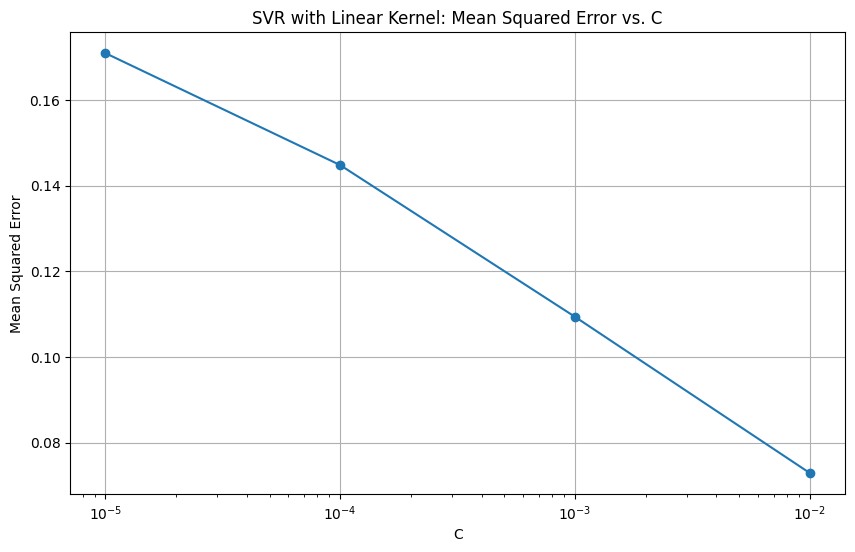

Mean Squared Error: 0.06437694864564417
Best C value: 0.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def svr_linear(X_train, X_test, y_train, y_test):
    # Define the parameter grid
    param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01]}

    # Initialize SVR model
    svr = SVR(kernel='linear')

    # Perform grid search
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Get the mean cross-validated scores
    cv_scores = -grid_search.cv_results_['mean_test_score']
    C_values = param_grid['C']

    # Plot the mean cross-validated scores against C values
    plt.figure(figsize=(10, 6))
    plt.plot(C_values, cv_scores, marker='o', linestyle='-')
    plt.title('SVR with Linear Kernel: Mean Squared Error vs. C')
    plt.xlabel('C')
    plt.ylabel('Mean Squared Error')
    plt.xscale('log')  # Use log scale for better visualization if C values span multiple orders of magnitude
    plt.grid(True)
    plt.show()

    # Get the best estimator
    best_svr = grid_search.best_estimator_

    # Fit the best model to the training data
    best_svr.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_svr.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Optionally, print the best parameter found
    print("Best C value:", best_svr.C)

    # Optionally, print other evaluation metrics
    # evaluate_errors(y_pred, y_test)

# Call the function with your data
svr_linear(X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.svm import SVR

def svr_linear(x, y_true):

  X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)

  # Initialize SVR model
  model = SVR(kernel='linear', C=0.1)

  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = model.predict(X_test)

  # Calculate mean squared error
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)
  evaluate_errors(y_pred, y_test)
  y_test_pred = model.predict(test_x)
  print("Results on Test Data")
  evaluate_errors(y_test_pred, test_y_true)
svr_linear(x, y_true)

Mean Squared Error: 0.05638336109039041
RMSE: 0.237
MAE: 0.186
R2: 0.866
Results on Test Data
RMSE: 0.290
MAE: 0.219
R2: 0.786



**2. SVR Algorithm - RBF Kernel + Linear Regression (ANN Model)**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

def calculate_average_spacing(X):
    """
    Calculates the average spacing (alpha) between data points in a dataset X.
    X is assumed to be a numpy array where rows are samples and columns are features.

    Parameters:
    - X: numpy array of shape (n_samples, n_features)

    Returns:
    - alpha: average distance between data points
    """
    # Step 1: Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Compute pairwise Euclidean distances
    # We use 'euclidean' which is the default metric, but you can specify it explicitly
    distances = pairwise_distances(X_scaled)

    # Step 3: Calculate the average distance from the distance matrix
    # We need to exclude the diagonal (distance from each point to itself) which is 0
    np.fill_diagonal(distances, np.nan)
    alpha = np.nanmean(distances)

    return alpha

# Example usage
# Assuming X is your data matrix # Example data: 100 samples and 5 features
alpha = calculate_average_spacing(x)
print(f"Average spacing (alpha): {alpha}")


Average spacing (alpha): 9.0907136088724


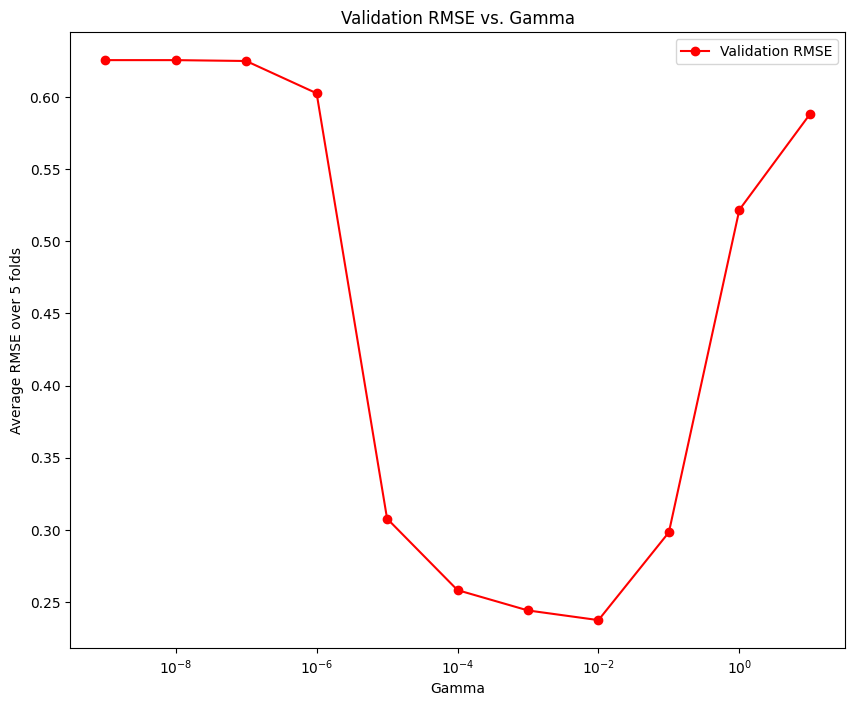

+--------+---------------------+
| Gamma  | Validation Avg RMSE |
+--------+---------------------+
| 1e-09  |  0.6255655915094389 |
| 1e-08  |  0.6255592901970639 |
| 1e-07  |  0.6249582688792368 |
| 1e-06  |  0.6025850186206719 |
| 1e-05  | 0.30780677820731117 |
| 0.0001 |  0.2582585129716595 |
| 0.001  | 0.24416558190672247 |
|  0.01  |  0.2374636604037706 |
|  0.1   | 0.29833135680492806 |
|   1    |  0.5218274591574283 |
|   10   |  0.5879745628633783 |
+--------+---------------------+
Best Model's Gamma: 0.01
Best Model's RMSE on Validation: 0.2374636604037706
Best Model's MAE on Validation: 0.17511446845631143
Best Model's R2 on Validation: 0.8446919325593552


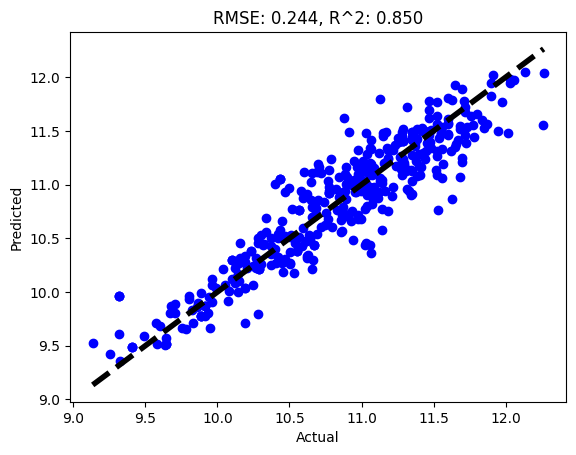

Prediction and evaluation on the test set
RMSE: 0.244
MAE: 0.189
R2: 0.850


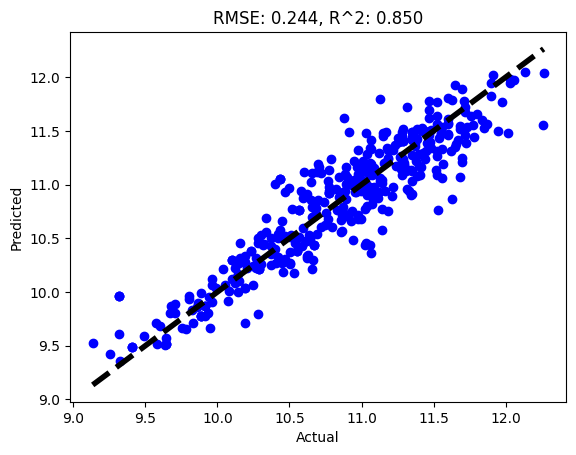

0.2435262339135938

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
from prettytable import PrettyTable

def RBF_Model(x, y_true, alpha=1.0):
    #M = 180
    #gamma_d = 1/M
    gammas = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
    kfolds = KFold(n_splits=5)  # 5 Fold cross-validation
    train_errors = []
    validation_errors = []
    mae_errors =[]
    r2_errors = []
    scaler = StandardScaler()

    # Model selection loop
    for gamma in gammas:
        temp_val_errors = []
        temp_r2_errors = []
        temp_mae_errors = []
        for train_idx, val_idx in kfolds.split(x):
            x_train, x_val = x[train_idx], x[val_idx]
            y_train, y_val = y_true[train_idx], y_true[val_idx]

            # Standardization of features
            x_train_scaled = scaler.fit_transform(x_train)
            x_val_scaled = scaler.transform(x_val)

            # RBF transformation
            x_train_transformed = rbf_kernel(x_train_scaled, x_train_scaled, gamma=gamma)
            x_val_transformed = rbf_kernel(x_val_scaled, x_train_scaled, gamma=gamma)

            # Ridge regression
            model = Ridge(alpha=alpha)
            model.fit(x_train_transformed, y_train)

            # Prediction and error calculation
            val_preds = model.predict(x_val_transformed)
            rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
            mae_val = mean_absolute_error(y_val, val_preds)
            r2_val = r_squared(y_val, val_preds)

            temp_val_errors.append(rmse_val)
            temp_mae_errors.append(mae_val)
            temp_r2_errors.append(r2_val)

        # Collect average of errors
        validation_errors.append(np.mean(temp_val_errors))
        mae_errors.append(np.mean(temp_mae_errors))
        r2_errors.append(np.mean(temp_r2_errors))

    # Determine the best gamma and corresponding RMSE
    best_index = np.argmin(validation_errors)
    best_gamma = gammas[best_index]
    best_rmse = validation_errors[best_index]
    best_mae = mae_errors[best_index]
    best_r2 = r2_errors[best_index]

    # Retrain on full dataset with best gamma
    x_scaled = scaler.fit_transform(x)  # Standardization of features
    x_transformed = rbf_kernel(x_scaled, x_scaled, gamma=best_gamma)  # RBF transformation
    best_model = Ridge(alpha=alpha)
    best_model.fit(x_transformed, y_true)  # Final model training

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.semilogx(gammas, validation_errors, marker='o', color='red', label='Validation RMSE')
    plt.xlabel('Gamma')
    plt.ylabel('Average RMSE over 5 folds')
    plt.title('Validation RMSE vs. Gamma')
    plt.legend()
    plt.show()

    # Print table of results
    table = PrettyTable()
    table.field_names = ['Gamma', 'Validation Avg RMSE']
    for gamma, rmse in zip(gammas, validation_errors):
        table.add_row([gamma, rmse])
    print(table)

    return best_model, best_gamma, best_rmse, best_mae, best_r2, scaler


best_model, best_gamma, best_rmse, best_mae, best_r2, scaler = RBF_Model(x, y_true, alpha=0.001)
print("Best Model's Gamma:", best_gamma)
print("Best Model's RMSE on Validation:", best_rmse)
print("Best Model's MAE on Validation:", best_mae)
print("Best Model's R2 on Validation:", best_r2)

# Standardization and RBF transformation of the test set
x_test_scaled = scaler.transform(test_x)  # Use the same scaler to transform the test set
x_test_transformed = rbf_kernel(x_test_scaled, scaler.transform(x), gamma=best_gamma)  # Apply RBF transformation using best_gamma

evaluate_and_plot(best_model, x_test_transformed, test_y_true)
print("Prediction and evaluation on the test set")
test_preds = best_model.predict(x_test_transformed)
evaluate_errors(test_preds, test_y_true)
evaluate_and_plot(best_model, x_test_transformed, test_y_true)


In [ ]:
def plot_results(y_true, y_pred, title, rmse=None, r_squared=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Predictions')

    if rmse is not None and r_squared is not None:
        plt.annotate(f'RMSE: {rmse:.2f}\nR-squared: {r_squared:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_confidence_intervals(y_true, y_pred, title, rmse=None, r_squared=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Predictions')

    # Calculate confidence interval
    confidence = 1.96 * np.std(y_pred - y_true)  # 95% confidence interval
    plt.fill_between([min(y_true), max(y_true)], [min(y_true) - confidence, max(y_true) - confidence], [min(y_true) + confidence, max(y_true) + confidence], color='gray', alpha=0.2, label='95% Confidence Interval')

    if rmse is not None and r_squared is not None:
        plt.annotate(f'RMSE: {rmse:.2f}\nR-squared: {r_squared:.2f}', xy=(0.85, 0.05), xycoords='axes fraction', fontsize=8)

    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()



**2.1. SVR Algorithm - RBF Kernel implementation using K-means Clustering + Linear Regression**

In [ ]:
# Define a custom RBF Transformer
class RBFTransformer:
    def __init__(self, centers, gamma=1.0):
        self.gamma = gamma
        self.centers = centers

    def transform(self, X):
        return rbf_kernel(X, self.centers, gamma=self.gamma)

def optimize_rbf_regression(X_train11, y_train11):
    """
    Optimizes RBF regression model using KMeans and linear regression, testing different
    values of K for centers and gamma for the RBF kernel.

    Parameters:
    - X_train11: Training data features
    - y_train11: Training data target variable

    Returns:
    - A dictionary with optimal K, gamma, RMSE, and centers.
    """

    # Set range for K and define KFold
    K_values = range(10, 101, 10)
    #K_values = range(10,51,10)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize variables for storing results
    optimal_rmse = float('inf')
    optimal_k = None
    optimal_gamma = None
    optimal_centers = None

    # Perform model selection
    for K in K_values:
        gamma_d = K / 32  # Scale factor for gamma
        gamma_values = gamma_d * np.array([0.01, 0.1, 1, 10, 100])

        for gamma in gamma_values:
            local_validation_rmse = []

            for train_index, val_index in kf.split(X_train11):
                X_train, X_val = X_train11[train_index], X_train11[val_index]
                y_train, y_val = y_train11[train_index], y_train11[val_index]

                best_centers = None
                best_fold_rmse = float('inf')

                # Run K-means multiple times and pick the best result based on RMSE
                for _ in range(5):
                    kmeans = KMeans(n_clusters=K, init='random', random_state=None)
                    kmeans.fit(X_train)
                    centers = kmeans.cluster_centers_
                    rbf_transformer = RBFTransformer(centers=centers, gamma=gamma)

                    # Transform the data using the RBF kernel
                    X_train_transformed = rbf_transformer.transform(X_train)
                    X_val_transformed = rbf_transformer.transform(X_val)

                    # Train and validate the linear regression model
                    model = LinearRegression()
                    model.fit(X_train_transformed, y_train)
                    y_val_pred = model.predict(X_val_transformed)

                    fold_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

                    if fold_rmse < best_fold_rmse:
                        best_fold_rmse = fold_rmse
                        best_centers = centers

                local_validation_rmse.append(best_fold_rmse)

            avg_val_rmse = np.mean(local_validation_rmse)

            if avg_val_rmse < optimal_rmse:
                optimal_rmse = avg_val_rmse
                optimal_k = K
                optimal_gamma = gamma
                optimal_centers = best_centers

    # Return the optimal parameters and RMSE
    return {
        "optimal_k": optimal_k,
        "optimal_gamma": optimal_gamma,
        "best_rmse": optimal_rmse,
        "optimal_centers": optimal_centers
    }

# # Usage Example:
# # Assuming you have already defined X_train11 and y_train11
results = optimize_rbf_regression(x, y_true)
# #Optimal K: 50, Optimal Gamma: 0.015625, Best RMSE: 29280.282387089344

rbf_transformer = RBFTransformer(centers=results['optimal_centers'], gamma=results['optimal_gamma'])

# Transform the full training set and the test set
X_train_transformed = rbf_transformer.transform(x)  # Ensure X_train11 is used here
model = LinearRegression()
model.fit(X_train_transformed, y_true)  # y_train11 should be the target variable for the full training set

# Transform the test data using the same transformer
X_test_transformed = rbf_transformer.transform(test_x)

# Predict the test data
y_pred = model.predict(X_test_transformed)
print(f"Optimal K: {results['optimal_k']}, Optimal Gamma: {results['optimal_gamma']}, Best RMSE: {results['best_rmse']}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal K: 100, Optimal Gamma: 0.03125, Best RMSE: 0.41634595901979904


{'optimal_k': 100, 'optimal_gamma': 0.03125, 'best_rmse': 0.41634595901979904, 'optimal_centers': array([[4.18181818e+00, 2.16090909e+00, 0.00000000e+00, ...,
        1.00454670e+02, 6.36363636e-01, 0.00000000e+00],
       [3.20000000e+01, 4.42000000e+00, 0.00000000e+00, ...,
        1.27335675e+02, 0.00000000e+00, 1.00000000e+00],
       [6.00000000e+00, 1.53500000e+00, 0.00000000e+00, ...,
        1.51425143e+02, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.66666667e+00, 2.16000000e+00, 3.46944695e-18, ...,
        1.41211998e+02, 0.00000000e+00, 3.33333333e-01],
       [7.82608696e+00, 1.66565217e+00, 0.00000000e+00, ...,
        1.57350512e+02, 7.82608696e-01, 2.17391304e-01],
       [7.76470588e+00, 1.45764706e+00, 3.46944695e-18, ...,
        1.57483691e+02, 8.23529412e-01, 1.17647059e-01]])}
RMSE: 0.403
MAE: 0.290
R2: 0.589


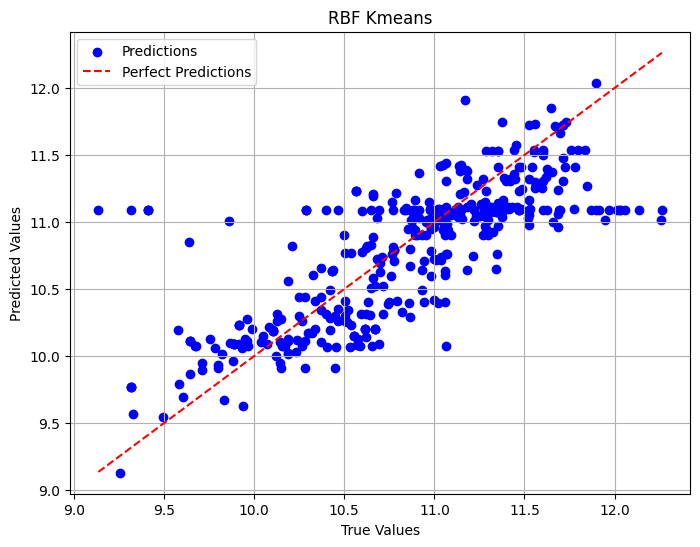

In [ ]:
print(results)
rmse = evaluate_errors(y_pred, test_y_true)
plot_results(test_y_true, y_pred, "RBF Kmeans", rmse = rmse)




**3. Bayesian Multivariate Linear Regression (Probabilistic Model)**


RMSE: 0.347
MAE: 0.243
R2: 0.688
(901, 50)
(901,)
Test Data Predictions
RMSE: 0.449
MAE: 0.281
R2: 0.488


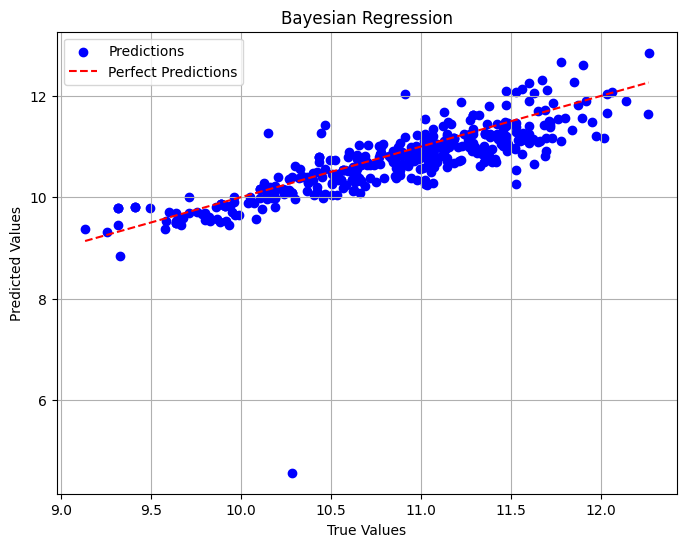

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def bayesian_linear_regression(x, y_true):
    y = y_true
    # Prior parameters for alpha (intercept) and betas (slopes)
    alpha_prior_mu = 0
    alpha_prior_sd = 10
    beta_prior_mu = np.zeros(x.shape[1])  # Prior mean vector for beta
    beta_prior_sd = np.ones(x.shape[1]) * 10  # Prior standard deviation vector for beta

    # Known variance of y
    sigma_y = 0.1

    # Initial estimate of betas using the normal equation for multiple linear regression
    beta_estimate = np.linalg.inv(x.T @ x) @ x.T @ y
    alpha_estimate = np.mean(y - x @ beta_estimate)  # Estimate alpha as average residual

    # Bayesian update for beta coefficients in a Normal-Normal model
    A_inv = np.diag(1 / (beta_prior_sd ** 2))
    B_inv = (x.T @ x) / sigma_y ** 2
    beta_post_cov = np.linalg.inv(A_inv + B_inv)
    beta_post_mean = beta_post_cov @ (A_inv @ beta_prior_mu + (x.T @ y) / sigma_y ** 2)

    # Predict using the posterior means of alpha and beta
    y_pred = alpha_estimate + x @ beta_post_mean

    # Calculate performance metrics
    evaluate_errors(y_pred, y)
    return y_pred, alpha_estimate, beta_post_mean

y_pred, alpha_estimate, beta_post_mean = bayesian_linear_regression(x, y_true)
print(x.shape)
print(y_true.shape)

#Test Data
y_pred_test = alpha_estimate + test_x @ beta_post_mean
# y_pred_test = bayesian_linear_regression(test_x, test_y_true)

# # Calculate metrics to evaluate the model performance on test data
# mse = mean_squared_error(test_y_true, y_pred_test)
# mae = mean_absolute_error(test_y_true, y_pred_test)
# r2 = r2_score(test_y_true, y_pred_test)
print("Test Data Predictions")
rmse = evaluate_errors(y_pred_test, test_y_true)
# print("Mean Squared Error on Test Data:", mse)
# print("Mean Absolute Error on Test Data:", mae)
# print("R^2 Score on Test Data:", r2)
plot_results(test_y_true, y_pred_test, "Bayesian Regression", rmse = rmse)


**4. Polynomial Regression**

In [ ]:

from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression_1(X, y, degree=2):

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Generating polynomial features
  poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  X_poly_train = poly_features.fit_transform(X_train)
  X_poly_test = poly_features.transform(X_test)

  # Create and train the model
  model = LinearRegression()
  model.fit(X_poly_train, y_train)

  # Predict and evaluate the model
  y_pred = model.predict(X_poly_test)
  y_pred_train = model.predict(X_poly_train)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R^2: {r2}")
  #evaluate_errors(y_pred, y_true)
  return model, poly_features

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
scaler.transform(test_x)
model, poly_features = polynomial_regression_1(x_scaled, y_true, degree = 2)  #Training data
#Test Data
X_poly_test = poly_features.transform(test_x)
y_pred = model.predict(X_poly_test)
print("Prediction on Test Data")
evaluate_errors(y_pred, test_y_true)
#plot_confidence_intervals(test_y_true, y_pred, title='Test Data: True vs Predicted with Confidence Intervals', rmse=np.sqrt(mean_squared_error(test_y_true, y_pred)), r_squared=r2_score(test_y_true, y_pred))

RMSE: 2904554357.5424404
MAE: 671057688.7980343
R^2: -2.0049990039858442e+19
Prediction on Test Data
RMSE: 102128323021.294
MAE: 86549743125.522
R2: -26465247920200863449088.000


(102128323021.29353, 86549743125.52176, -2.6465247920200863e+22)

**4.1 Polynomial Regression (with Regularization)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def polynomial_regression_2(X, y, alpha):

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  ###########

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  poly_features = PolynomialFeatures(degree=2, include_bias=False)
  X_poly_train = poly_features.fit_transform(X_train_scaled)
  X_poly_test = poly_features.transform(X_test_scaled)

  # Ridge regression
  ridge_model = Ridge(alpha=alpha)  # alpha is the regularization strength
  ridge_model.fit(X_poly_train, y_train)

  y_pred_ridge = ridge_model.predict(X_poly_test)
  rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
  mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
  r2_ridge = r2_score(y_test, y_pred_ridge)

  print(f"RMSE: {rmse_ridge:.3f}")
  print(f"MAE: {mae_ridge:.3f}")
  print(f"R^2 Score: {r2_ridge:.3f}")
  return poly_features, ridge_model

poly_features, ridge_model = polynomial_regression_2(x, y_true, 0.01)
#Test Data
X_poly_test = poly_features.transform(test_x)
y_pred = ridge_model.predict(X_poly_test)
print("Prediction on Test Data:")
evaluate_errors(y_pred, test_y_true)
#plot_confidence_intervals(test_y_true, y_pred, title='Test Data: True vs Predicted with Confidence Intervals', rmse=np.sqrt(mean_squared_error(test_y_true, y_pred)), r_squared=r2_score(test_y_true, y_pred))

# #Testing against standardized data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(x)

# poly_featuress, ridge_models = polynomial_regression_2(X_scaled, y_true)
# #Test Data
# X_poly_test = poly_featuress.transform(test_x)
# y_pred = ridge_models.predict(X_poly_test)
# print("Prediction on Test Data:")
# evaluate_errors(y_pred, test_y_true)


RMSE: 0.396
MAE: 0.241
R^2 Score: 0.627
Prediction on Test Data:
RMSE: 8800.615
MAE: 5811.472
R2: -196521271.507


(8800.614570531474, 5811.471967427406, -196521271.5068374)

**5. Multilayer Perceptron (ANN Model)**

Epoch 1/15
18/18 [==============================] - 1s 16ms/step - loss: 1362.6422 - mse: 1362.6422 - val_loss: 370.5605 - val_mse: 370.5605
Epoch 2/15
18/18 [==============================] - 0s 5ms/step - loss: 170.8188 - mse: 170.8188 - val_loss: 61.0038 - val_mse: 61.0038
Epoch 3/15
18/18 [==============================] - 0s 4ms/step - loss: 58.4397 - mse: 58.4397 - val_loss: 30.0345 - val_mse: 30.0345
Epoch 4/15
18/18 [==============================] - 0s 5ms/step - loss: 32.3235 - mse: 32.3235 - val_loss: 22.1109 - val_mse: 22.1109
Epoch 5/15
18/18 [==============================] - 0s 5ms/step - loss: 23.6927 - mse: 23.6927 - val_loss: 20.6723 - val_mse: 20.6723
Epoch 6/15
18/18 [==============================] - 0s 4ms/step - loss: 19.8243 - mse: 19.8243 - val_loss: 16.0534 - val_mse: 16.0534
Epoch 7/15
18/18 [==============================] - 0s 5ms/step - loss: 16.3338 - mse: 16.3338 - val_loss: 12.0663 - val_mse: 12.0663
Epoch 8/15
18/18 [==============================] - 0

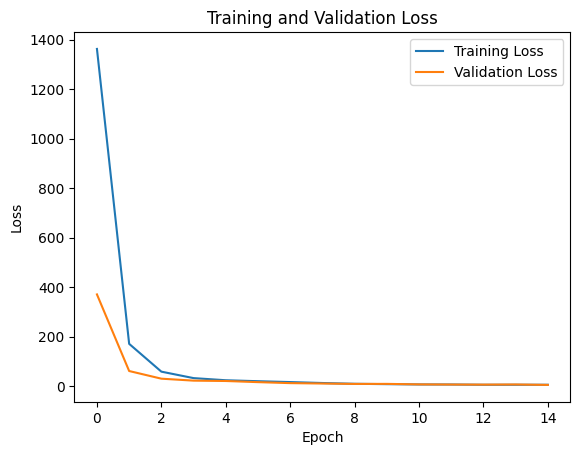

6/6 [==============================] - 0s 2ms/step
RMSE: 2.877
MAE: 1.680
R2: -3559.789


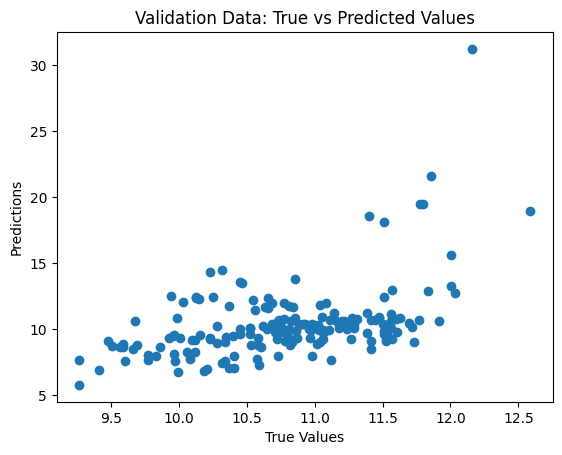

Predictions for Test Data:
13/13 [==============================] - 0s 2ms/step
RMSE: 2.527
MAE: 1.826
R2: -6511.714


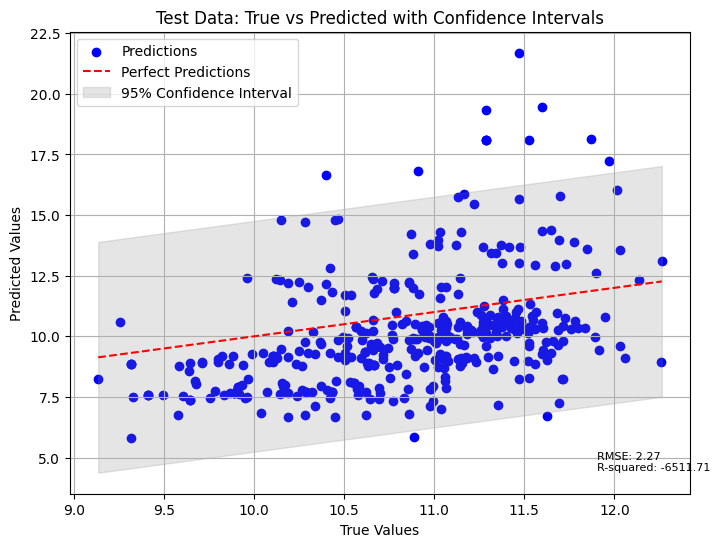

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

def MLP(X, y, epochs=10, batch_size=32):
    # Define the architecture of the MLP for regression
    def build_regression_mlp(input_shape):
        model = models.Sequential([
            layers.Dense(64, activation='relu', input_shape=input_shape),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)  # Output layer without activation function for regression
        ])
        return model

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the MLP model for regression
    input_shape = X_train.shape[1:]
    model = build_regression_mlp(input_shape)

    # Compile the model with Adam optimizer
    model.compile(optimizer='adam',
                  loss='mean_squared_error',  # Using mean squared error for regression
                  metrics=['mse'])            # Mean Squared Error metric for evaluation

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Evaluate the model on test data
    test_loss, test_mse = model.evaluate(X_test, y_test)
    print(f"Test loss: {test_loss}, Test MSE: {test_mse}")

    # Visualize the training history (loss)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Make predictions on test data
    y_pred = model.predict(X_test)
    evaluate_errors(y_pred, y_test)

    # Visualize the predicted vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Validation Data: True vs Predicted Values')
    plt.show()

    # evaluate_errors(y_pred, y_test)  # This function seems to be missing or undefined

    return model, history

# Call the MLP function
trained_model, history = MLP(x, y_true, epochs=15, batch_size=32)


# Evaluate the model on test data
#test_loss, test_mse = trained_model.evaluate(test_x, test_y_true)
#print(f"Test loss: {test_loss}, Test MSE: {test_mse}")

# # Visualize the training history (loss)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Make predictions on test data
print("Predictions for Test Data:")
test_y_pred = trained_model.predict(test_x)
evaluate_errors(test_y_pred, test_y_true)

# # Visualize the predicted vs actual values
# plt.scatter(test_y_true, test_y_pred)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.title('Test Data: True vs Predicted Values')
# plt.show()

plot_confidence_intervals(test_y_true, test_y_pred, title='Test Data: True vs Predicted with Confidence Intervals', rmse=np.sqrt(mean_squared_error(test_y_true, test_y_pred)), r_squared=r_squared(test_y_true, test_y_pred))




**5.1 MLP with regularization**

Epoch 1/30
18/18 [==============================] - 1s 14ms/step - loss: 1027.2872 - mse: 1026.3418 - val_loss: 225.2203 - val_mse: 224.3096
Epoch 2/30
18/18 [==============================] - 0s 5ms/step - loss: 95.8826 - mse: 94.9973 - val_loss: 60.5486 - val_mse: 59.6898
Epoch 3/30
18/18 [==============================] - 0s 4ms/step - loss: 34.2160 - mse: 33.3782 - val_loss: 26.2177 - val_mse: 25.4020
Epoch 4/30
18/18 [==============================] - 0s 4ms/step - loss: 17.7502 - mse: 16.9518 - val_loss: 13.5162 - val_mse: 12.7359
Epoch 5/30
18/18 [==============================] - 0s 4ms/step - loss: 10.5581 - mse: 9.7915 - val_loss: 8.3751 - val_mse: 7.6230
Epoch 6/30
18/18 [==============================] - 0s 4ms/step - loss: 8.4788 - mse: 7.7380 - val_loss: 7.0844 - val_mse: 6.3554
Epoch 7/30
18/18 [==============================] - 0s 5ms/step - loss: 6.6013 - mse: 5.8818 - val_loss: 6.4750 - val_mse: 5.7653
Epoch 8/30
18/18 [==============================] - 0s 4ms/step - 

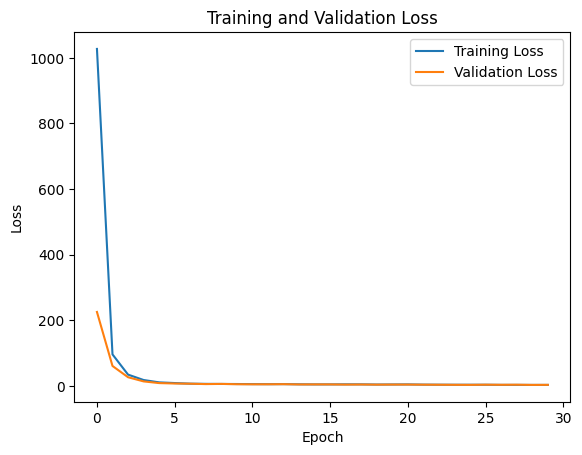

6/6 [==============================] - 0s 2ms/step


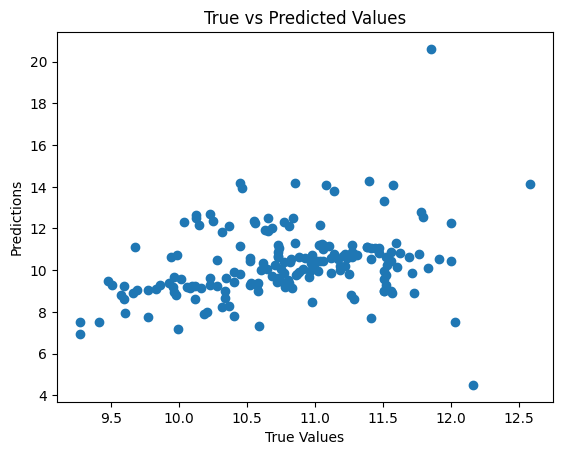

RMSE: 1.901
MAE: 1.281
R2: -1553.450
13/13 [==============================] - 0s 2ms/step - loss: 3.0685 - mse: 2.4335
Test loss: 3.068504810333252, Test MSE: 2.433544635772705
13/13 [==============================] - 0s 2ms/step


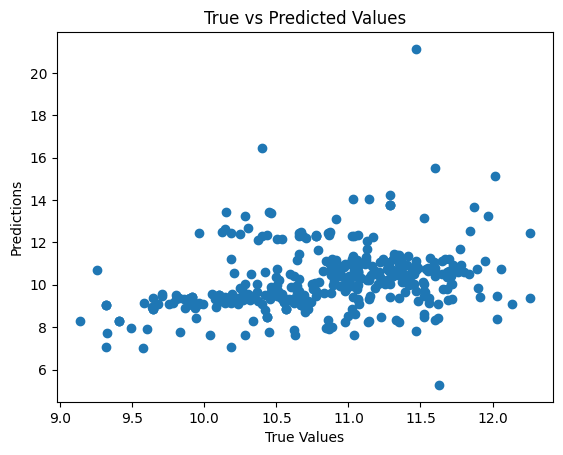

RMSE: 1.742
MAE: 1.201
R2: -3095.321


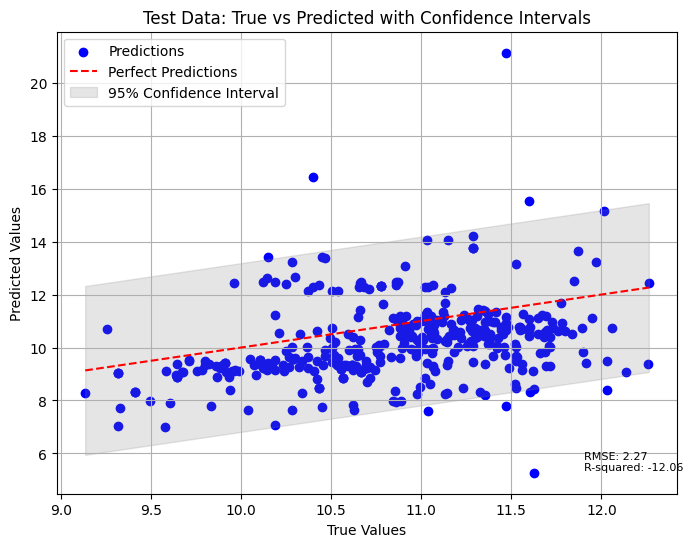

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def MLP_with_regularization(X, y_true, epochs=10, batch_size=32, l2_penalty=0.01):
    # Define the architecture of the MLP for regression with L2 regularization
    def build_regression_mlp_with_regularization(input_shape, l2_penalty):
        model = models.Sequential([
            layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_penalty), input_shape=input_shape),
            layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_penalty)),
            layers.Dense(1)  # Output layer without activation function for regression
        ])
        return model

    X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

    # Build the MLP model for regression with L2 regularization
    input_shape = X_train.shape[1:]
    model = build_regression_mlp_with_regularization(input_shape, l2_penalty)

    # Compile the model with Adam optimizer
    model.compile(optimizer='adam',
                  loss='mean_squared_error',  # Using mean squared error for regression
                  metrics=['mse'])            # Mean Squared Error metric for evaluation

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Evaluate the model on test data
    test_loss, test_mse = model.evaluate(X_test, y_test)
    print(f"Test loss: {test_loss}, Test MSE: {test_mse}")

    # Visualize the training history (loss)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Visualize the predicted vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.show()

    evaluate_errors(y_pred, y_test)

    return model, history


# Call the MLP_with_regularization function
trained_model_with_regularization, historyy = MLP_with_regularization(x, y_true, epochs=30, batch_size=32, l2_penalty=0.01)
test_loss, test_mse = trained_model_with_regularization.evaluate(test_x, test_y_true)
print(f"Test loss: {test_loss}, Test MSE: {test_mse}")

# # Visualize the training history (loss)
# plt.plot(historyy.history['loss'], label='Training Loss')
# plt.plot(historyy.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Make predictions on test data
y_test_pred =  trained_model_with_regularization.predict(test_x)

# Visualize the predicted vs actual values
plt.scatter(test_y_true, y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

evaluate_errors(y_test_pred, test_y_true)
plot_confidence_intervals(test_y_true, y_test_pred, title='Test Data: True vs Predicted with Confidence Intervals', rmse=np.sqrt(mean_squared_error(test_y_true, test_y_pred)), r_squared=r2_score(test_y_true, test_y_pred))


Linear Regression
Performance measures on Test Data:


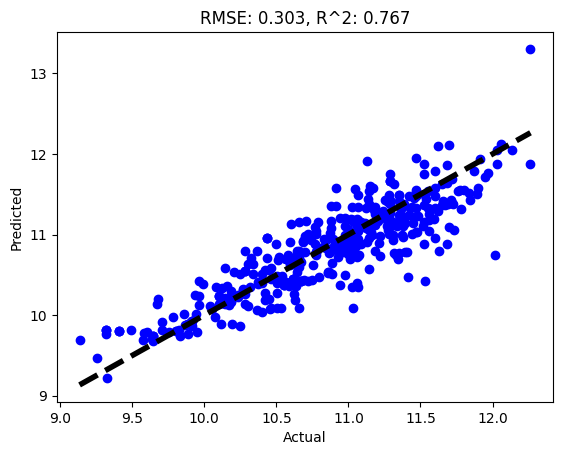

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def fit_pca(x):
    # Standardizing the data
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Applying PCA to retain 97% of variance
    pca_model = PCA(n_components=0.95)
    components = pca_model.fit_transform(x_scaled)

    x_pca = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(pca_model.n_components_)])
    return np.array(x_pca), pca_model, scaler

def transform_pca(x, pca_model, scaler):
    # Standardizing the data using the already fitted scaler
    x_scaled = scaler.transform(x)

    # Applying the already fitted PCA model
    components = pca_model.transform(x_scaled)

    x_pca = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(pca_model.n_components_)])
    return np.array(x_pca)

#Processing the training data
x_pca, pca_model, scaler = fit_pca(x)
# Processing the test data
test_x_pca = transform_pca(test_x, pca_model, scaler)


#Linear Regression
print("Linear Regression")
lr = linear_regression(x_pca, y_true)
# Evaluate on Test data
print("Performance measures on Test Data:")
rmse = evaluate_and_plot(lr, test_x_pca, test_y_true)   # Test Data


In [ ]:
X_train, X_val_pca, y_train, y_val = train_test_split(x_pca, y_true, test_size=0.2, random_state=42)

Regularized Linear Regression
Testing alpha: 1e-15


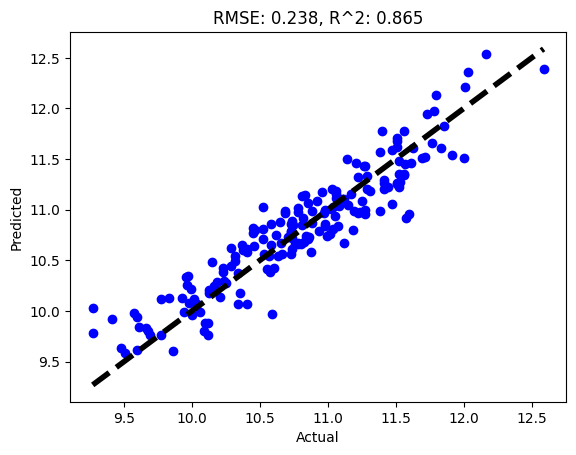

Testing alpha: 1e-10


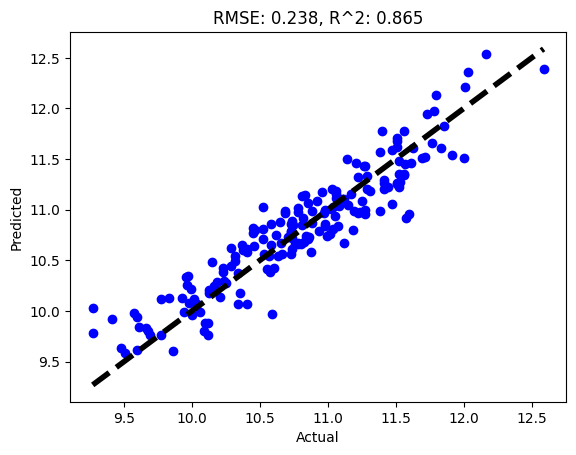

Testing alpha: 1e-08


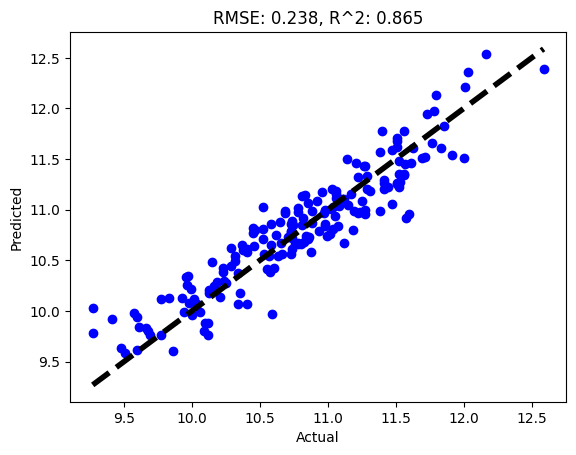

Testing alpha: 0.0001


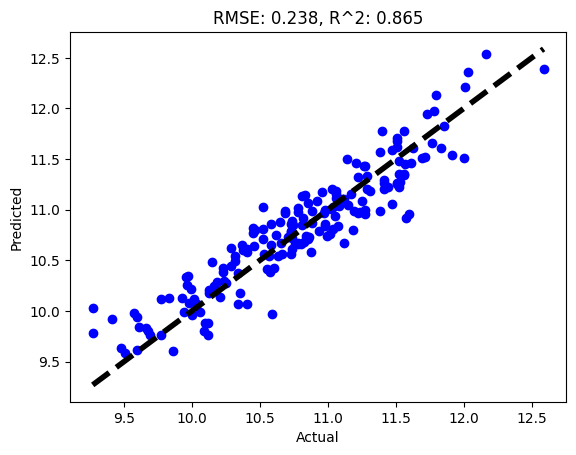

Testing alpha: 0.001


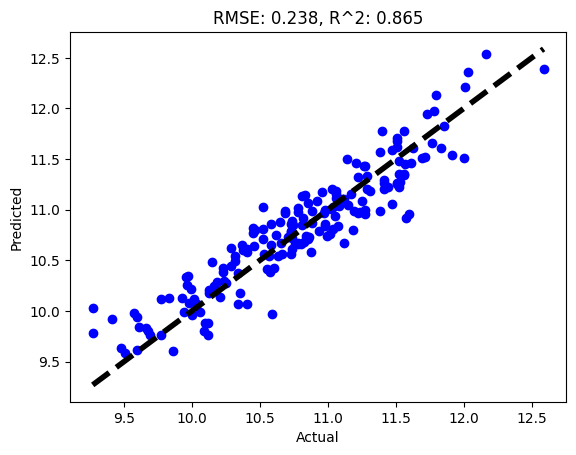

Testing alpha: 0.01


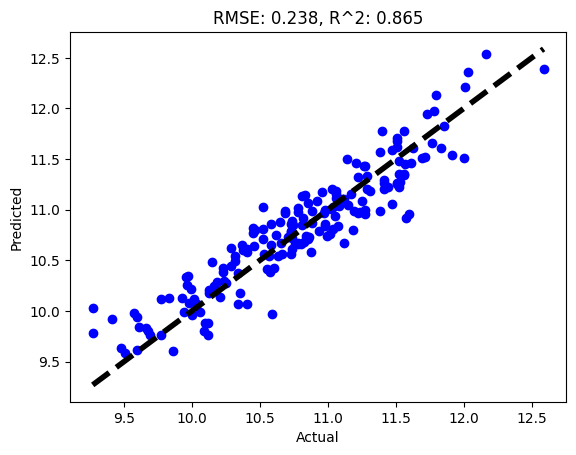

Testing alpha: 1


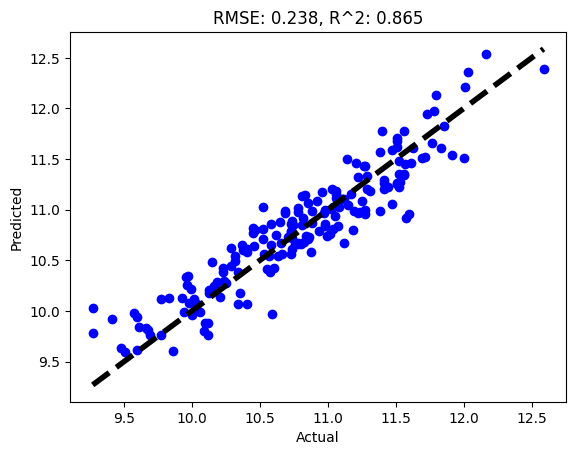

Testing alpha: 5


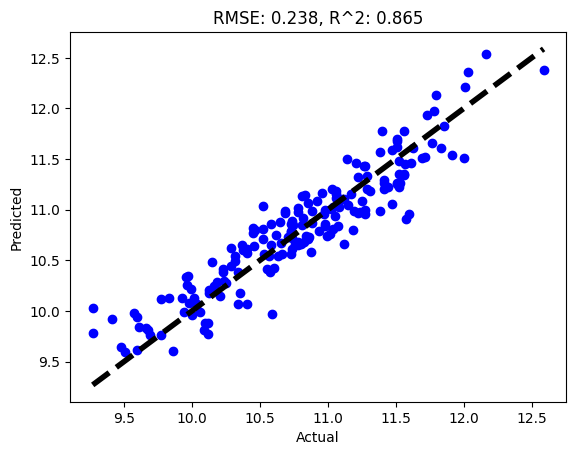

Testing alpha: 10


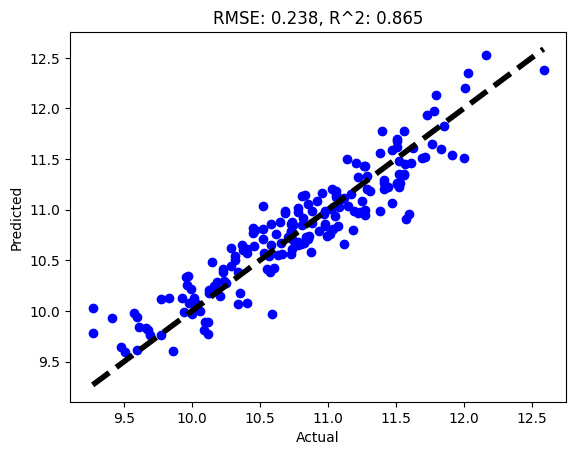

Testing alpha: 20


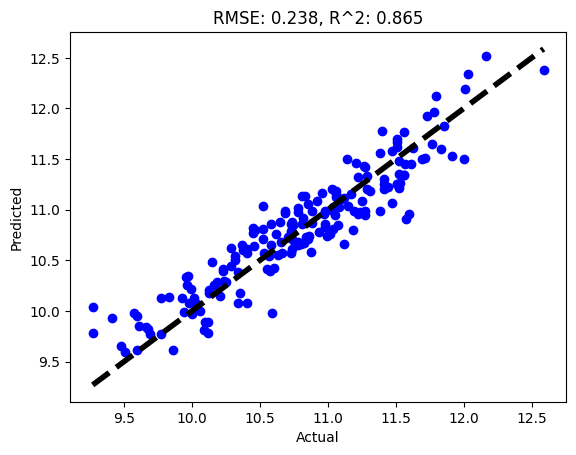

Best alpha found: 1e-15
Lowest RMSE: 0.23799001668308628
Performance measures on Test Data:
RMSE: 0.301
MAE: 0.230
R2: 0.769


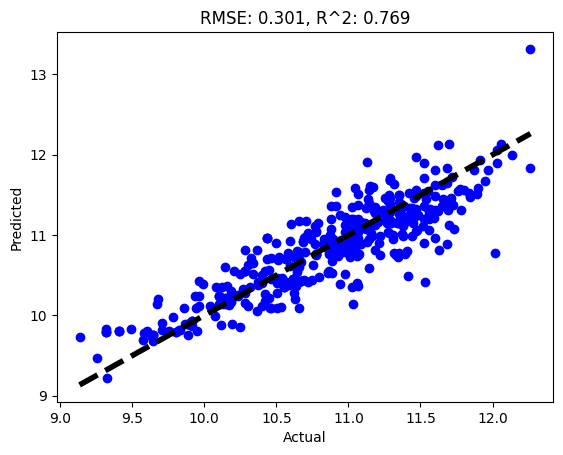

Best alpha after pca 1e-15


In [ ]:
#Ridge Regression
print("Regularized Linear Regression")
best_alpha_val, best_model = best_alpha(x_pca, y_true)  # Make sure x1 and y_true are defined

# Evaluate on test data
print("Performance measures on Test Data:")
test_preds = best_model.predict(test_x_pca)
evaluate_errors(test_preds, test_y_true)
evaluate_and_plot(best_model, test_x_pca, test_y_true)
print("Best alpha after pca", best_alpha_val)

In [ ]:
#Bayesian
y_pred, alpha_estimate, beta_post_mean = bayesian_linear_regression(x_pca, y_true)

#Test Data
y_pred_test = alpha_estimate + test_x_pca @ beta_post_mean
print("Test Data Predictions")
evaluate_errors(y_pred_test, test_y_true)

RMSE: 0.249
MAE: 0.197
R2: 0.839
Test Data Predictions
RMSE: 0.303
MAE: 0.230
R2: 0.767


(0.30287452099722006, 0.23037746897911612, 0.7672396262497498)

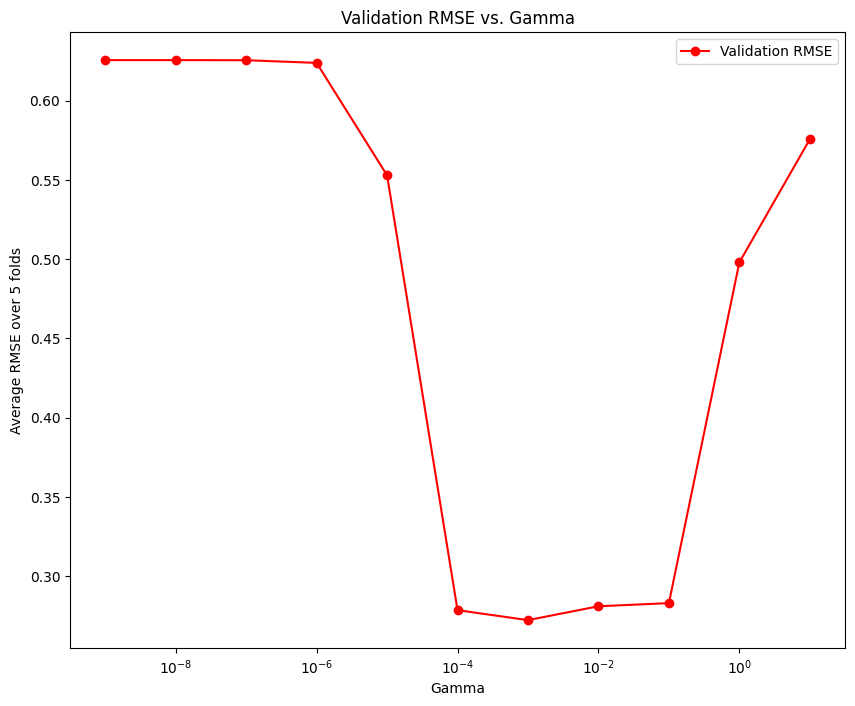

+--------+---------------------+
| Gamma  | Validation Avg RMSE |
+--------+---------------------+
| 1e-09  |  0.6255656485851809 |
| 1e-08  |  0.6255649948543586 |
| 1e-07  |  0.6255014813208918 |
| 1e-06  |  0.6238235507083721 |
| 1e-05  |  0.5528859105178581 |
| 0.0001 | 0.27858424140135674 |
| 0.001  |  0.2723006181724546 |
|  0.01  |  0.2810390995195259 |
|  0.1   | 0.28302224606582754 |
|   1    |  0.4979476169675108 |
|   10   |  0.5756123733962065 |
+--------+---------------------+
RMSE: 0.272
MAE: 0.212
R2: 0.801
Prediction and evaluation on the test set
RMSE: 0.299
MAE: 0.229
R2: 0.773


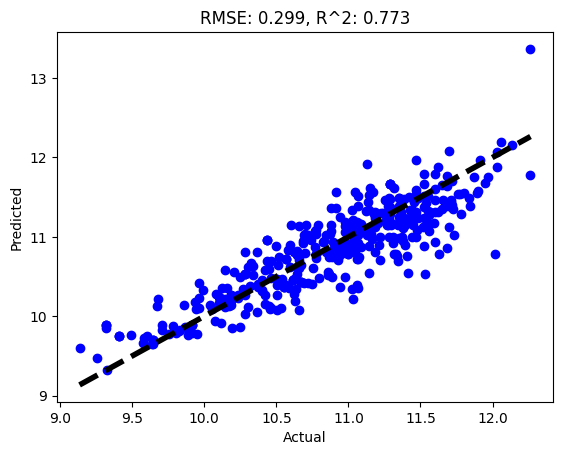

0.2990587997257532

In [ ]:
# RBF Method 1
best_model, best_gamma, best_rmse, best_mae, best_r2, scaler = RBF_Model(x_pca, y_true, alpha=0.001)
print(f"RMSE: {best_rmse:.3f}")
print(f"MAE: {best_mae:.3f}")
print(f"R2: {best_r2:.3f}")
# Standardization and RBF transformation of the test set
x_test_scaled = scaler.transform(test_x_pca)  # Use the same scaler to transform the test set
x_test_transformed = rbf_kernel(x_test_scaled, scaler.transform(x_pca), gamma=best_gamma)  # Apply RBF transformation using best_gamma
print("Prediction and evaluation on the test set")
test_preds = best_model.predict(x_test_transformed)
evaluate_errors(test_preds, test_y_true)
evaluate_and_plot(best_model, x_test_transformed, test_y_true)

In [ ]:
#Polynomial Regression
model, poly_features = polynomial_regression_1(x_pca, y_true, degree = 2)  #Training data
#Test Data
X_poly_test = poly_features.transform(test_x_pca)
y_pred = model.predict(X_poly_test)
print("Prediction on Test Data")
evaluate_errors(y_pred, test_y_true)


RMSE: 173988454673.39572
MAE: 31142874085.290836
R^2: -7.19442361267499e+22
Prediction on Test Data
RMSE: 378083077227.695
MAE: 96572071247.084
R2: -362708758945519626092544.000


(378083077227.69464, 96572071247.08444, -3.627087589455196e+23)

In [ ]:
poly_features, ridge_model = polynomial_regression_2(x_pca, y_true, 0.01)
#Test Data
X_poly_test = poly_features.transform(test_x_pca)
y_pred = ridge_model.predict(X_poly_test)
print("Prediction on Test Data:")
evaluate_errors(y_pred, test_y_true)

RMSE: 5.278
MAE: 1.095
R^2 Score: -65.203
Prediction on Test Data:
RMSE: 7.147
MAE: 3.954
R2: -128.615


(7.147199765116372, 3.9541654233645933, -128.61504261905887)

In [ ]:
poly_features, ridge_model = polynomial_regression_2(x_pca, y_true,1)
#Test Data
X_poly_test = poly_features.transform(test_x_pca)
y_pred = ridge_model.predict(X_poly_test)
print("Prediction on Test Data:")
evaluate_errors(y_pred, test_y_true)

RMSE: 0.838
MAE: 0.309
R^2 Score: -0.668
Prediction on Test Data:
RMSE: 2.136
MAE: 1.450
R2: -10.580


(2.136291003624664, 1.4504205295001122, -10.579888786980318)

In [ ]:
poly_features, ridge_model = polynomial_regression_2(x_pca, y_true,5)
#Test Data
X_poly_test = poly_features.transform(test_x_pca)
y_pred = ridge_model.predict(X_poly_test)
print("Prediction on Test Data:")
evaluate_errors(y_pred, test_y_true)

RMSE: 0.397
MAE: 0.215
R^2 Score: 0.626
Prediction on Test Data:
RMSE: 1.559
MAE: 1.039
R2: -5.165


(1.5586978738531116, 1.039068288336344, -5.164636186804782)

In [1]:
poly_features, ridge_model = polynomial_regression_2(x_pca, y_true,500)
#Test Data
X_poly_test = poly_features.transform(test_x_pca)
y_pred = ridge_model.predict(X_poly_test)
print("Prediction on Test Data:")
evaluate_errors(y_pred, test_y_true)

NameError: name 'polynomial_regression_2' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y_true)